In [2]:
import pandas as pd
import numpy as np
import os
import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import plotly
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.chdir("C:/cygwin64/home/Pankaj.Pa.Kumar/GreyAtom Class/capstone/data/")

In [4]:
customer_data = pd.read_excel("Customer_Data.xlsx")
jtd = pd.read_csv("JTD.csv")

# Cleaning of JTD data

In [5]:
jtd.tail(10)

,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
5619474,5619474,962812,10,MISC_SRV07,NaN,MISC_OTHER CHARGES,P011,1.0,MIN,23387.34
5619475,5619475,962813,10,PAINT_SRV,ACCDBP0056,PAINTING FULL BODY - SOLID,P001,22000.0,MIN,26999.90
5619476,5619476,962813,20,ACCT_SRV,ACCDBP0068,DENTING ROOF,P001,1800.0,MIN,2399.99
5619477,5619477,962813,30,ACCT_SRV,ACCDBP0074,MINOR DENTING PER PANEL,P001,550.0,MIN,5549.98
5619478,5619478,962813,40,ACCT_SRV,ACCDBP0120,DENTING RADIATOR MOUNTING PANEL UPPER,P001,850.0,MIN,1050.00
5619479,5619479,962813,50,ACCT_SRV,ACCDBP0121,DENTING RADIATOR MOUNTING PANEL LOWER,P001,850.0,MIN,1050.00
5619480,5619480,962813,60,ACCT_SRV,ACCDBP0110,DENTING QUARTER PANEL RHS,P001,750.0,MIN,1250.00
5619481,5619481,962813,70,TOYOTA_SRV,TOINEL0029,CHARGING BATTERY & TESTING LOAD,P001,42.0,MIN,223.00
5619482,5619482,962813,80,ACCT_SRV,ACCDEL0093,REPAIR LHS / RHS TAIL LIGHT BOX,P001,450.0,MIN,450.00
5619483,5619483,962813,90,ACCT_SRV,ACCDBP0037,DENTING FRONT BUMPER,P001,1200.0,MIN,2149.99


In [6]:
jtd.isnull().sum()

Unnamed: 0                   0
DBM Order                    0
Order Item                   0
Material                 51629
Labor Value Number     3774033
Description              51629
Item Category                0
Order Quantity               0
Target quantity UoM      51629
Net value                    0
dtype: int64

In [7]:
aggregation_jtd_dbno={ 'Description' : {'Description' : lambda x: str(set(x)).strip('{}').replace("'","")},
                      'Item Category' : {'Item Category' : lambda x: str(set(x)).strip('{}').replace("'","")}, 
                      'Order Quantity' : {'Order Quantity' : 'sum'},
                      'Net value' : {'Net value' : 'sum'} }


In [8]:
jtd_grouped = jtd.groupby('DBM Order')['Description','Item Category','Order Quantity',
                                       'Net value'].agg(aggregation_jtd_dbno).reset_index()

In [9]:
jtd_grouped.head()

,DBM Order,Description,Item Category,Order Quantity,Net value
0,4,"WUERTH ANTIFREEZ COOLANT GREEN, SPARK PLUG, SH...","P001, P011, P002, P010",731.6,16998.49
1,5,"FILTER A-OIL ENG, SHELL ENGINE OIL PETROL, Pai...","P001, P002",290.2,3779.80
2,6,"REPLACE STARTER MOTOR ASSY, Paid Service-Minor...",P001,109.0,1340.37
3,7,MISC LABOR 0.25 HOURS,P001,36.5,167.36
4,8,"WASHER 14MM, ELF Synthetic Engine OIL, AIR FIL...","P001, P002",69.0,2306.94


In [10]:
jtd_grouped.shape

(973473, 5)

In [11]:
jtd_grouped.isnull().sum()

DBM Order         0
Description       0
Item Category     0
Order Quantity    0
Net value         0
dtype: int64

# Cleaning of customer data

In [12]:
customer_data.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,1.0,Z001,NaN,NaN,NaN,NaN,NaT
1,32,2,1.0,Z005,NaN,NaN,NaN,NaN,NaT
2,34,4,1.0,Z005,NaN,2.0,NaN,NaN,NaT
3,35,5,1.0,Z005,NaN,NaN,NaN,NaN,NaT
4,42,7,1.0,Z008,NaN,NaN,NaN,NaN,NaT


In [13]:
customer_data.isnull().sum()

Business Partner         0
Customer No.             0
Partner Type            78
Data Origin            136
Title                46307
Marital Status      539301
Occupation          540780
Date of Birth       541894
Death date          554675
dtype: int64

In [14]:
customer_data.shape

(555338, 9)

In [15]:
customer_data["Data Origin"].nunique()

22

In [16]:
customer_data["Partner Type"].value_counts()

1.0       554967
2.0           68
3.0           62
9001.0        57
9003.0        56
4.0           48
9002.0         2
Name: Partner Type, dtype: int64

In [17]:
customer_data.drop(["Marital Status", "Occupation", "Date of Birth", "Death date","Business Partner"],1,
                   inplace=True)

In [18]:
customer_data['Partner Type'] = customer_data['Partner Type'].fillna(customer_data['Partner Type'].mode()[0])

In [19]:
customer_data['Data Origin'] = customer_data['Data Origin'].fillna(customer_data['Data Origin'].mode()[0])

In [20]:
customer_data['Title'] = customer_data['Title'].fillna(customer_data['Title'].mode()[0])

In [21]:
customer_data.isnull().sum()

Customer No.    0
Partner Type    0
Data Origin     0
Title           0
dtype: int64

In [22]:
customer_data.head()

,Customer No.,Partner Type,Data Origin,Title
0,1,1.0,Z001,2.0
1,2,1.0,Z005,2.0
2,4,1.0,Z005,2.0
3,5,1.0,Z005,2.0
4,7,1.0,Z008,2.0


# Cleaning of final invoice

In [23]:
final_invoice = pd.read_csv("Final_invoice.csv",infer_datetime_format = True)

In [24]:
pd.set_option('display.max_columns', None)
final_invoice.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,0.0,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,0.0,0.0,0.0,0.0,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,0.0,52.95,400607,BC01,THANE,NaN,NO,0.0,AP09AX0582,0.0,0.0,0.0,0.0,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,0.0,944.16,400603,BC01,THANE,NaN,NO,0.0,MH04CD9768,0.0,0.0,0.0,0.0,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [25]:
final_invoice["Job Card No"].nunique()

489329

In [26]:
final_invoice.isnull().sum()

Unnamed: 0                   0
Amt Rcvd From Custom    197286
Amt Rcvd From Ins Co    197286
Area / Locality          23890
CGST(14%)               197286
CGST(2.5%)              197286
CGST(6%)                197286
CGST(9%)                197286
CITY                         1
Cash /Cashless Type     464894
Claim No.               487510
Cust Type                    0
Customer No.                 0
District                     0
Expiry Date             470083
Gate Pass Date          451399
Gate Pass Time               0
IGST(12%)               197286
IGST(18%)               197286
IGST(28%)               197286
IGST(5%)                197286
Insurance Company       468723
Invoice Date                 0
Invoice No                   0
Invoice Time                 0
Job Card No                  0
JobCard Date                 0
JobCard Time                 0
KMs Reading                  0
Labour Total                 0
Make                         0
Misc Total                   0
Model   

In [27]:
columns_to_be_removed = final_invoice.isnull().sum()[final_invoice.isnull().sum().sort_values() > 30000].index

In [28]:
columns_to_be_removed

Index(['Amt Rcvd From Custom', 'Amt Rcvd From Ins Co', 'CGST(14%)',
       'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)', 'Cash /Cashless Type',
       'Claim No.', 'Expiry Date', 'Gate Pass Date', 'IGST(12%)', 'IGST(18%)',
       'IGST(28%)', 'IGST(5%)', 'Insurance Company', 'ODN No.',
       'Outstanding Amt', 'Policy no.', 'SGST/UGST(14%)', 'SGST/UGST(2.5%)',
       'SGST/UGST(6%)', 'SGST/UGST(9%)', 'Service Advisor Name', 'TDS amount',
       'Technician Name', 'Total CGST', 'Total GST', 'Total IGST',
       'Total SGST/UGST', 'Total Value'],
      dtype='object')

In [29]:
final_invoice = final_invoice.drop(columns=columns_to_be_removed)

In [30]:
final_invoice.shape

(492314, 29)

In [31]:
final_invoice.head()

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,4051.95,BC01FS1
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,1001.29,BC01SA2
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,233.14,BC01SA2
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,0.00,BC01SA2
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,MH04CD9768,2747.12,BC01SA2


In [32]:
columns_irrelevant = ['Area / Locality', 'Print Status', 'Gate Pass Time', 'Recovrbl Exp']

In [33]:
final_invoice = final_invoice.drop(columns=columns_irrelevant)

In [34]:
final_invoice.dropna(subset=['Regn No'], inplace=True)

In [35]:
final_invoice.isnull().sum().sort_values()

Unnamed: 0               0
Regn No                  0
Plant Name1              0
Plant                    0
Pin code                 0
Parts Total              0
Order Type               0
OSL Total                0
Misc Total               0
Make                     0
Total Amt Wtd Tax.       0
Labour Total             0
JobCard Time             0
JobCard Date             0
Job Card No              0
Invoice Time             0
Invoice No               0
Invoice Date             0
District                 0
Customer No.             0
Cust Type                0
KMs Reading              0
User ID                  0
CITY                     1
Model                 1524
dtype: int64

In [36]:
final_invoice['CITY'] = final_invoice['CITY'].fillna(final_invoice['CITY'].mode()[0])
final_invoice['Model']  = final_invoice['Model'].fillna(final_invoice['Model'].mode()[0])

In [37]:
final_invoice.rename(columns= {"District" : "State"}, inplace=True)

In [38]:
final_invoice["Invoice month"] = pd.DatetimeIndex(final_invoice['Invoice Date']).month

In [39]:
final_invoice.drop(["Unnamed: 0"],1,inplace=True)

In [40]:
final_invoice.tail()

,CITY,Cust Type,Customer No.,State,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total Amt Wtd Tax.,User ID,Invoice month
492309,Chennai,Retail,203820,Tamil Nadu,2016-06-30,7231000017,14:56:58,400100,2016-06-30,09:15:12,72546,2495.90,MARUTI SUZUKI,374.97,ALTO,0.0,Paid Service,1587.28,600058,X405,X405 - NANGAN MOTORS PVT. LTD.,TN38Y9343,4458.15,X405SA1,6
492310,ADAMBAKKAM,Retail,170411,Tamil Nadu,2016-06-30,7231000018,15:06:52,400092,2016-06-30,08:42:15,18968,2443.47,NISSAN,0.00,MICRA,0.0,Paid Service,4388.61,600088,X405,X405 - NANGAN MOTORS PVT. LTD.,TN22CK0396,6832.08,X405SA1,6
492311,CHENNAI,Retail,48811,Tamil Nadu,2016-06-30,7231000019,15:43:56,400082,2016-06-30,08:27:51,177433,2598.92,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.0,Paid Service,6588.79,600044,X405,X405 - NANGAN MOTORS PVT. LTD.,TN07BA0211,9187.71,X405SA1,6
492312,"Vijaya Nagar, 1 main road,Velacherr",Retail,204067,Tamil Nadu,2016-06-30,7231000020,15:58:59,400545,2016-06-30,12:53:48,22932,11000.00,HONDA,100.00,AMAZE,0.0,Accidental,0.00,600042,X405,X405 - NANGAN MOTORS PVT. LTD.,TN07BV9290,11100.00,X405SA1,6
492313,saidapet,Retail,204288,Tamil Nadu,2016-06-30,7231000021,17:09:19,400891,2016-06-30,16:54:06,149197,747.78,MARUTI SUZUKI,0.00,WAGONR,0.0,Running Repairs,0.00,600016,X405,X405 - NANGAN MOTORS PVT. LTD.,TN10T3317,747.78,X405WM1,6


In [41]:
final_invoice.shape

(492298, 25)

# Cleaning of plant master

In [42]:
plant_master = pd.read_excel("PlantMaster.xlsx")

In [43]:
plant_master.head()

,Plant,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.0,600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,BC30,PLBC30,PLBC30,IN,NaN,"C-118, Phase 07,",160055.0,160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,X001,PLX001,NaN,IN,Thane,"Unit No.3, Kothari Compound,",400610.0,400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,X002,PLX002,NaN,IN,Ghaziabad,"18/1, C Site 4, Sahibabad",201010.0,201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,X003,PLX003,NaN,IN,Bengaluru,"#75, Sy.No. 83/2, Panathur Mai",560087.0,560087,Bengaluru,MFCB,Karnataka


In [44]:
plant_master.isnull().sum()

Plant                        0
Name 1                       0
Valuation Area               0
Customer no. - plant         0
Vendor number plant        436
Factory calendar             0
Name 2                       2
House number and street      2
PO Box                       1
Postal Code                  0
City                         0
Sales organization           5
State                        0
dtype: int64

In [45]:
plant_master.shape

(438, 13)

In [46]:
plant = plant_master.drop(columns=['Vendor number plant', 'Valuation Area',
                                      'Factory calendar', 'Name 2', 'House number and street',
                                      'PO Box', 'Sales organization', 'Customer no. - plant'])

In [47]:
plant.shape

(438, 5)

In [48]:
plant.isnull().sum()

Plant          0
Name 1         0
Postal Code    0
City           0
State          0
dtype: int64

In [49]:
plant.head()

,Plant,Name 1,Postal Code,City,State
0,BC07,NERKUNDRAM,600107,Chennai,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,160055,Mohali,Punjab
2,X001,X001 - AUTO PLANET WHEELS,400610,Thane,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,201010,Ghaziabad,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,560087,Bengaluru,Karnataka


# Merging data

In [50]:
final_invoice['Customer No.'] = final_invoice['Customer No.'].str.lstrip('0')

In [51]:
customer_data['Customer No.'] = customer_data['Customer No.'].astype(str)

In [52]:
invoice_customer = pd.merge(final_invoice, customer_data, on='Customer No.')

In [53]:
invoice_customer.shape, len(final_invoice['Customer No.'].unique()), len(customer_data['Customer No.'].unique()), len(invoice_customer['Customer No.'].unique())

((492296, 28), 253480, 555338, 253478)

In [54]:
invoice_customer.isnull().sum()

CITY                  0
Cust Type             0
Customer No.          0
State                 0
Invoice Date          0
Invoice No            0
Invoice Time          0
Job Card No           0
JobCard Date          0
JobCard Time          0
KMs Reading           0
Labour Total          0
Make                  0
Misc Total            0
Model                 0
OSL Total             0
Order Type            0
Parts Total           0
Pin code              0
Plant                 0
Plant Name1           0
Regn No               0
Total Amt Wtd Tax.    0
User ID               0
Invoice month         0
Partner Type          0
Data Origin           0
Title                 0
dtype: int64

In [55]:
invoice_customer.head()

,CITY,Cust Type,Customer No.,State,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total Amt Wtd Tax.,User ID,Invoice month,Partner Type,Data Origin,Title
0,Thane,Retail,67849,Maharashtra,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.0,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,KA19MA1291,4051.95,BC01FS1,1,1.0,Z007,2.0
1,Thane,Retail,67849,Maharashtra,2014-08-14,7000137359,17:54:30,136482,2014-08-08,15:26:53,45575,989.98,GENERAL MOTORS,0.0,SPARK,6249.87,Accidental,4230.25,400601,BC01,THANE,KA19MA1291,11470.10,BC01FS1,8,1.0,Z007,2.0
2,Thane,Retail,67849,Maharashtra,2014-08-16,7000137489,10:52:30,135895,2014-08-06,12:49:48,45575,6473.05,GENERAL MOTORS,0.0,SPARK,7325.09,Paid Service,14546.14,400601,BC01,THANE,KA19MA1291,28344.28,BC01FS1,8,1.0,Z007,2.0
3,Thane,Retail,67849,Maharashtra,2014-10-09,7000151113,17:35:30,150383,2014-10-06,11:40:52,47556,0.00,GENERAL MOTORS,0.0,SPARK,0.00,Running Repairs,200.00,400601,BC01,THANE,KA19MA1291,200.00,BC01SA1,10,1.0,Z007,2.0
4,Thane,Retail,67849,Maharashtra,2014-12-31,7000175211,18:41:00,168210,2014-12-13,12:14:37,49317,1760.02,GENERAL MOTORS,500.0,SPARK,7850.09,Accidental,20348.81,400601,BC01,THANE,KA19MA1291,30458.92,BC01FS1,12,1.0,Z007,2.0


In [56]:
jtd_grouped.head()

,DBM Order,Description,Item Category,Order Quantity,Net value
0,4,"WUERTH ANTIFREEZ COOLANT GREEN, SPARK PLUG, SH...","P001, P011, P002, P010",731.6,16998.49
1,5,"FILTER A-OIL ENG, SHELL ENGINE OIL PETROL, Pai...","P001, P002",290.2,3779.80
2,6,"REPLACE STARTER MOTOR ASSY, Paid Service-Minor...",P001,109.0,1340.37
3,7,MISC LABOR 0.25 HOURS,P001,36.5,167.36
4,8,"WASHER 14MM, ELF Synthetic Engine OIL, AIR FIL...","P001, P002",69.0,2306.94


In [57]:
plant.head()

,Plant,Name 1,Postal Code,City,State
0,BC07,NERKUNDRAM,600107,Chennai,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,160055,Mohali,Punjab
2,X001,X001 - AUTO PLANET WHEELS,400610,Thane,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,201010,Ghaziabad,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,560087,Bengaluru,Karnataka


In [58]:
plant.shape

(438, 5)

In [59]:
plant.rename(columns= {"State" : "State_Plant"}, inplace=True)

In [60]:
invoice_customer_plant = pd.merge(invoice_customer,plant, on='Plant')

In [61]:
df_plant_check = invoice_customer_plant.copy()

In [62]:
invoice_customer_plant.head(5)

,CITY,Cust Type,Customer No.,State,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total Amt Wtd Tax.,User ID,Invoice month,Partner Type,Data Origin,Title,Name 1,Postal Code,City,State_Plant
0,THANE,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,1802.05,FORD,0.0,FIESTA,0.0,Paid Service,399.73,600406,X006,X006 - A.M.MOTORS,MH03AB0789,2201.78,X006SA1,6,1.0,Z010,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra
1,Thane,Retail,E15810,Maharashtra,2016-07-20,7151205340,10:26:00,413455,2016-07-18,15:49:34,53903,2874.80,MARUTI SUZUKI,0.0,SWIFT,0.0,Running Repairs,3151.06,421301,X006,X006 - A.M.MOTORS,MH04CT295,6025.86,X006WM1,7,1.0,Z001,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra
2,Thane,Retail,E15810,Maharashtra,2016-09-04,7151205916,11:12:47,446448,2016-08-30,10:10:59,54231,2799.96,MARUTI SUZUKI,0.0,SWIFT,0.0,Running Repairs,664.04,421301,X006,X006 - A.M.MOTORS,MH04CT295,3464.00,X006WM1,9,1.0,Z001,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra
3,NAVI MUMBAI,Retail,73857,Maharashtra,2016-10-28,7151206592,13:17:54,487708,2016-10-18,17:47:35,55118,554.95,HYUNDAI,0.0,VERNA,0.0,Running Repairs,1510.80,400096,X006,X006 - A.M.MOTORS,MH43AN1186,2065.75,X006SA1,10,1.0,Z001,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra
4,Thane,Retail,E25519,Maharashtra,2015-05-28,7151201014,18:20:37,220109,2015-05-28,17:57:40,182687,75.02,MAHINDRA & MAHINDRA,0.0,LOGAN D,0.0,Running Repairs,578.43,400607,X006,X006 - A.M.MOTORS,MH04DN6210,653.45,X006SA1,5,1.0,Z001,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra


In [63]:
invoice_customer_plant["Name 1"].value_counts().head()

NERKUNDRAM                     11815
SAS NAGAR - MOHALI              7403
X006 - A.M.MOTORS               6505
X025 - SHIVALIK AUTOMOBILES     5497
X013 - SAI AUTO WORKS           4971
Name: Name 1, dtype: int64

In [64]:
invoice_customer_plant.drop(["Postal Code","Plant","City","State_Plant"],1, inplace = True)

In [65]:
invoice_customer_plant.head()

,CITY,Cust Type,Customer No.,State,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant Name1,Regn No,Total Amt Wtd Tax.,User ID,Invoice month,Partner Type,Data Origin,Title,Name 1
0,THANE,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,1802.05,FORD,0.0,FIESTA,0.0,Paid Service,399.73,600406,X006 - A.M.MOTORS,MH03AB0789,2201.78,X006SA1,6,1.0,Z010,2.0,X006 - A.M.MOTORS
1,Thane,Retail,E15810,Maharashtra,2016-07-20,7151205340,10:26:00,413455,2016-07-18,15:49:34,53903,2874.80,MARUTI SUZUKI,0.0,SWIFT,0.0,Running Repairs,3151.06,421301,X006 - A.M.MOTORS,MH04CT295,6025.86,X006WM1,7,1.0,Z001,2.0,X006 - A.M.MOTORS
2,Thane,Retail,E15810,Maharashtra,2016-09-04,7151205916,11:12:47,446448,2016-08-30,10:10:59,54231,2799.96,MARUTI SUZUKI,0.0,SWIFT,0.0,Running Repairs,664.04,421301,X006 - A.M.MOTORS,MH04CT295,3464.00,X006WM1,9,1.0,Z001,2.0,X006 - A.M.MOTORS
3,NAVI MUMBAI,Retail,73857,Maharashtra,2016-10-28,7151206592,13:17:54,487708,2016-10-18,17:47:35,55118,554.95,HYUNDAI,0.0,VERNA,0.0,Running Repairs,1510.80,400096,X006 - A.M.MOTORS,MH43AN1186,2065.75,X006SA1,10,1.0,Z001,2.0,X006 - A.M.MOTORS
4,Thane,Retail,E25519,Maharashtra,2015-05-28,7151201014,18:20:37,220109,2015-05-28,17:57:40,182687,75.02,MAHINDRA & MAHINDRA,0.0,LOGAN D,0.0,Running Repairs,578.43,400607,X006 - A.M.MOTORS,MH04DN6210,653.45,X006SA1,5,1.0,Z001,2.0,X006 - A.M.MOTORS


In [66]:
invoice_customer_plant["KMs Reading"] = invoice_customer_plant["KMs Reading"].astype(int)
invoice_customer_plant.loc[invoice_customer_plant["KMs Reading"] <= 100000, "KMs Reading"] = 0

invoice_customer_plant.loc[(invoice_customer_plant["KMs Reading"] > 100000) 
                           & (invoice_customer_plant["KMs Reading"] <= 200000), "KMs Reading"] = 1

invoice_customer_plant.loc[(invoice_customer_plant["KMs Reading"] > 200000) 
                           & (invoice_customer_plant["KMs Reading"] <= 300000), "KMs Reading"] = 2
invoice_customer_plant.loc[(invoice_customer_plant["KMs Reading"] > 300000) 
                           & (invoice_customer_plant["KMs Reading"] <= 400000), "KMs Reading"] = 3

invoice_customer_plant.loc[(invoice_customer_plant["KMs Reading"] > 400000) 
                           & (invoice_customer_plant["KMs Reading"] <= 500000), "KMs Reading"] = 4

invoice_customer_plant.loc[(invoice_customer_plant["KMs Reading"] > 500000) 
                           & (invoice_customer_plant["KMs Reading"] <= 600000), "KMs Reading"] = 5

invoice_customer_plant.loc[(invoice_customer_plant["KMs Reading"] > 600000) 
                           & (invoice_customer_plant["KMs Reading"] <= 700000), "KMs Reading"] = 6

invoice_customer_plant.loc[invoice_customer_plant["KMs Reading"] > 700000, "KMs Reading"] = 7


In [67]:
invoice_customer_plant["KMs Reading"].value_counts()

0    191538
1     52137
2      7720
3      1680
7      1508
4       541
5       343
6       287
Name: KMs Reading, dtype: int64

In [68]:
invoice_customer_plant.head()

,CITY,Cust Type,Customer No.,State,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant Name1,Regn No,Total Amt Wtd Tax.,User ID,Invoice month,Partner Type,Data Origin,Title,Name 1
0,THANE,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,0,1802.05,FORD,0.0,FIESTA,0.0,Paid Service,399.73,600406,X006 - A.M.MOTORS,MH03AB0789,2201.78,X006SA1,6,1.0,Z010,2.0,X006 - A.M.MOTORS
1,Thane,Retail,E15810,Maharashtra,2016-07-20,7151205340,10:26:00,413455,2016-07-18,15:49:34,0,2874.80,MARUTI SUZUKI,0.0,SWIFT,0.0,Running Repairs,3151.06,421301,X006 - A.M.MOTORS,MH04CT295,6025.86,X006WM1,7,1.0,Z001,2.0,X006 - A.M.MOTORS
2,Thane,Retail,E15810,Maharashtra,2016-09-04,7151205916,11:12:47,446448,2016-08-30,10:10:59,0,2799.96,MARUTI SUZUKI,0.0,SWIFT,0.0,Running Repairs,664.04,421301,X006 - A.M.MOTORS,MH04CT295,3464.00,X006WM1,9,1.0,Z001,2.0,X006 - A.M.MOTORS
3,NAVI MUMBAI,Retail,73857,Maharashtra,2016-10-28,7151206592,13:17:54,487708,2016-10-18,17:47:35,0,554.95,HYUNDAI,0.0,VERNA,0.0,Running Repairs,1510.80,400096,X006 - A.M.MOTORS,MH43AN1186,2065.75,X006SA1,10,1.0,Z001,2.0,X006 - A.M.MOTORS
4,Thane,Retail,E25519,Maharashtra,2015-05-28,7151201014,18:20:37,220109,2015-05-28,17:57:40,1,75.02,MAHINDRA & MAHINDRA,0.0,LOGAN D,0.0,Running Repairs,578.43,400607,X006 - A.M.MOTORS,MH04DN6210,653.45,X006SA1,5,1.0,Z001,2.0,X006 - A.M.MOTORS


In [69]:
invoice_customer_plant.shape, invoice_customer_plant.columns

((255754, 28),
 Index(['CITY', 'Cust Type', 'Customer No.', 'State', 'Invoice Date',
        'Invoice No', 'Invoice Time', 'Job Card No', 'JobCard Date',
        'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
        'Model', 'OSL Total', 'Order Type', 'Parts Total', 'Pin code',
        'Plant Name1', 'Regn No', 'Total Amt Wtd Tax.', 'User ID',
        'Invoice month', 'Partner Type', 'Data Origin', 'Title', 'Name 1'],
       dtype='object'))

In [70]:
invoice_customer_plant['Invoice Date'] = pd.to_datetime(invoice_customer_plant['Invoice Date'])

In [71]:
invoice_customer_plant['Invoice Date Time'] = invoice_customer_plant['Invoice Date'].astype(str).str.cat(invoice_customer_plant[['Invoice Time']].astype(str),sep=' ')

In [72]:
invoice_customer_plant['JobCard Date'] =  pd.to_datetime(invoice_customer_plant['JobCard Date'])

In [73]:
invoice_customer_plant['JobCard Date Time'] = invoice_customer_plant['JobCard Date'].astype(str).str.cat(invoice_customer_plant[['JobCard Time']].astype(str), sep=' ')

In [74]:
invoice_customer_plant.loc[:, ['JobCard Date Time', 'JobCard Date','JobCard Time']].head()

,JobCard Date Time,JobCard Date,JobCard Time
0,2015-06-19 13:56:32,2015-06-19,13:56:32
1,2016-07-18 15:49:34,2016-07-18,15:49:34
2,2016-08-30 10:10:59,2016-08-30,10:10:59
3,2016-10-18 17:47:35,2016-10-18,17:47:35
4,2015-05-28 17:57:40,2015-05-28,17:57:40


In [75]:
invoice_customer_plant.loc[:, ['Invoice Date Time', 'Invoice Date','Invoice Time']].head()

,Invoice Date Time,Invoice Date,Invoice Time
0,2015-06-19 18:10:34,2015-06-19,18:10:34
1,2016-07-20 10:26:00,2016-07-20,10:26:00
2,2016-09-04 11:12:47,2016-09-04,11:12:47
3,2016-10-28 13:17:54,2016-10-28,13:17:54
4,2015-05-28 18:20:37,2015-05-28,18:20:37


In [76]:
invoice_customer_plant['Invoice Date Time'] = pd.to_datetime(invoice_customer_plant['Invoice Date Time'])

In [77]:
invoice_customer_plant['JobCard Date Time'] = pd.to_datetime(invoice_customer_plant['JobCard Date Time'])

In [78]:
invoice_customer_plant['ServiceTime'] = invoice_customer_plant['Invoice Date Time']-invoice_customer_plant['JobCard Date Time']

In [79]:
invoice_customer_plant.loc[:, ['ServiceTime']].head()

,ServiceTime
0,0 days 04:14:02
1,1 days 18:36:26
2,5 days 01:01:48
3,9 days 19:30:19
4,0 days 00:22:57


In [80]:
invoice_customer_plant.shape

(255754, 31)

In [81]:
invoice_customer_plant = invoice_customer_plant.loc[invoice_customer_plant['ServiceTime']>pd.Timedelta(hours=0),:]

In [82]:
invoice_customer_plant.shape

(255753, 31)

In [83]:
invoice_customer_plant["Order Type"].value_counts()

Running Repairs      145444
Paid Service          72424
Accidental            21241
Mechanical            12910
SMC Redemption         2028
SMC Value Package      1431
Repeat Order            258
WBW Order                17
Name: Order Type, dtype: int64

In [84]:
invoice_customer_plant['ServiceTime_category']=None
invoice_customer_plant.loc[invoice_customer_plant['ServiceTime']<pd.Timedelta(hours=13),'ServiceTime_category']='super_fast'
invoice_customer_plant.loc[(invoice_customer_plant['ServiceTime']>=pd.Timedelta(hours=13))&(invoice_customer_plant['ServiceTime']<pd.Timedelta(hours=36)),'ServiceTime_category']='fast'
invoice_customer_plant.loc[(invoice_customer_plant['ServiceTime']>=pd.Timedelta(hours=36))&(invoice_customer_plant['ServiceTime']<pd.Timedelta(hours=61)),'ServiceTime_category']='mid'
invoice_customer_plant.loc[(invoice_customer_plant['ServiceTime']>=pd.Timedelta(hours=61))&(invoice_customer_plant['ServiceTime']<pd.Timedelta(hours=84)),'ServiceTime_category']='slow'
invoice_customer_plant.loc[invoice_customer_plant['ServiceTime']>=pd.Timedelta(hours=84),'ServiceTime_category']='super_slow'

In [85]:
invoice_customer_plant.drop(columns=
                            ['Invoice Time', 'Invoice Date', 'Invoice No', 'JobCard Date', 'JobCard Time','Model','Pin code','Plant Name1','User ID','Name 1','CITY','Invoice Date Time','JobCard Date Time','ServiceTime'],
                            inplace=True)

# Merging jtd and invoice data

In [86]:
len(invoice_customer_plant['Job Card No'].unique()), len(jtd_grouped['DBM Order'].unique())

(253199, 973473)

In [87]:
invoice_customer_plant_jtd = pd.merge(invoice_customer_plant, jtd_grouped, 
                                               left_on='Job Card No', right_on='DBM Order').drop('DBM Order', axis=1)

In [88]:
invoice_customer_plant_jtd.head()

,Cust Type,Customer No.,State,Job Card No,KMs Reading,Labour Total,Make,Misc Total,OSL Total,Order Type,Parts Total,Regn No,Total Amt Wtd Tax.,Invoice month,Partner Type,Data Origin,Title,ServiceTime_category,Description,Item Category,Order Quantity,Net value
0,Retail,80479,Maharashtra,227460,0,1802.05,FORD,0.0,0.0,Paid Service,399.73,MH03AB0789,2201.78,6,1.0,Z010,2.0,super_fast,"HEAD LIGHT HOLDER, INSULATION TAPE, Paid Servi...","P001, P002",45.5,2201.78
1,Retail,E15810,Maharashtra,413455,0,2874.80,MARUTI SUZUKI,0.0,0.0,Running Repairs,3151.06,MH04CT295,6025.86,7,1.0,Z001,2.0,mid,"CLIP, Air Filter-Plastic Moulded Petrol, Paid ...","P001, P002",202.5,6025.86
2,Retail,E15810,Maharashtra,446448,0,2799.96,MARUTI SUZUKI,0.0,0.0,Running Repairs,664.04,MH04CT295,3464.00,9,1.0,Z001,2.0,super_slow,"SEAL, CRANKSHAFT FRONT OIL, GASKET, CYLINDER H...","P001, P002",189.0,3464.00
3,Retail,73857,Maharashtra,487708,0,554.95,HYUNDAI,0.0,0.0,Running Repairs,1510.80,MH43AN1186,2065.75,10,1.0,Z001,2.0,super_slow,"MFC PROLEUM C14/SL 15W40, Paid Service-Minor, ...","P001, P002",7.0,2065.75
4,Retail,E25519,Maharashtra,220109,1,75.02,MAHINDRA & MAHINDRA,0.0,0.0,Running Repairs,578.43,MH04DN6210,653.45,5,1.0,Z001,2.0,super_fast,"REMOVE & REFIT WIPER BLADE REAR, NOZZLE-LH WS ...","P001, P002",13.0,653.45


In [89]:
invoice_customer_plant_jtd.isnull().sum()

Cust Type               0
Customer No.            0
State                   0
Job Card No             0
KMs Reading             0
Labour Total            0
Make                    0
Misc Total              0
OSL Total               0
Order Type              0
Parts Total             0
Regn No                 0
Total Amt Wtd Tax.      0
Invoice month           0
Partner Type            0
Data Origin             0
Title                   0
ServiceTime_category    0
Description             0
Item Category           0
Order Quantity          0
Net value               0
dtype: int64

In [90]:
invoice_customer_plant_jtd.shape

(255714, 22)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

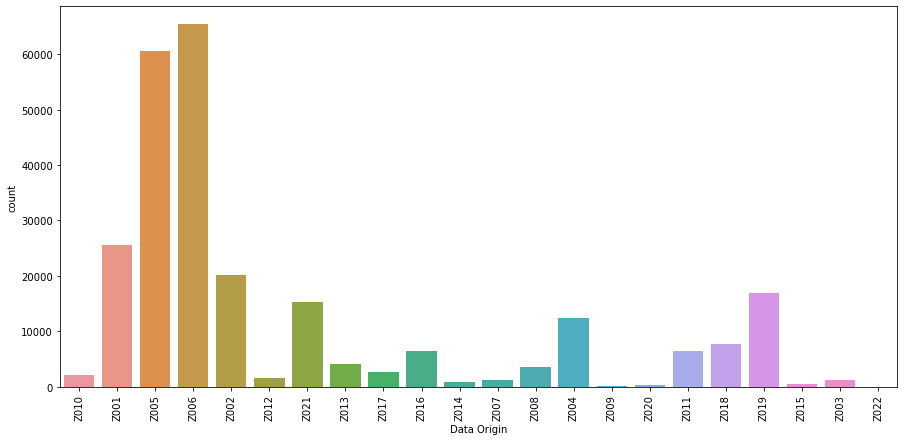

In [91]:
plt.figure(figsize=(15,7))
sns.countplot(invoice_customer_plant_jtd["Data Origin"])
plt.xticks(rotation = 90)

In [92]:
invoice_customer_plant_jtd["Order Type"].value_counts()

Running Repairs      145429
Paid Service          72415
Accidental            21227
Mechanical            12910
SMC Redemption         2028
SMC Value Package      1431
Repeat Order            258
WBW Order                16
Name: Order Type, dtype: int64

[Text(0, 0.5, 'Count of Orders'), Text(0.5, 1.0, 'Order Type Trends')]

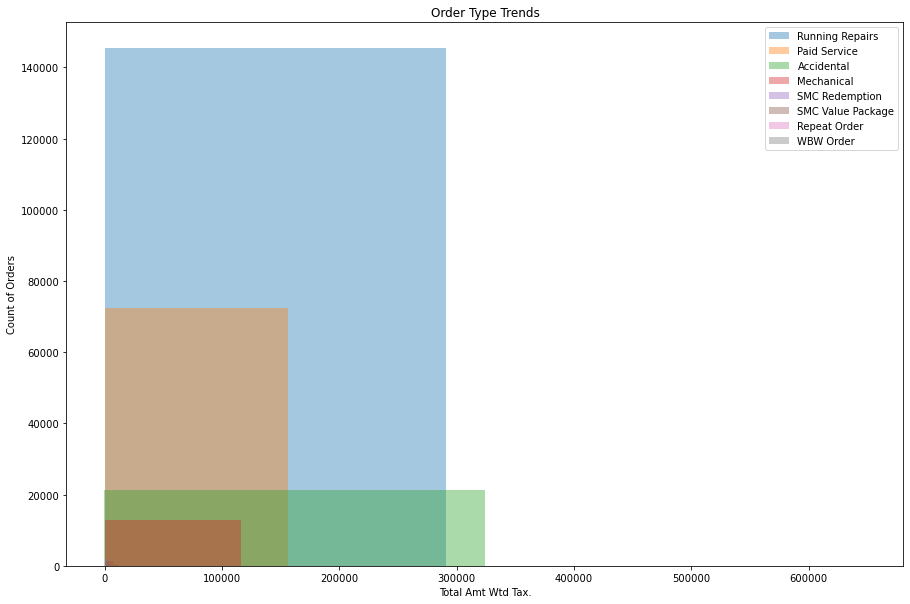

In [93]:
fig, axes = plt.subplots(figsize=(15, 10))

ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="Running Repairs"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Running Repairs", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="Paid Service"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Paid Service", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="Accidental"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Accidental", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="Mechanical"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Mechanical", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="SMC Redemption"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "SMC Redemption", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="SMC Value Package"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "SMC Value Package", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="Repeat Order"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Repeat Order", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="WBW Order"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "WBW Order", ax = axes, kde =False)
ax.legend()

ax.set(ylabel='Count of Orders', title='Order Type Trends')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

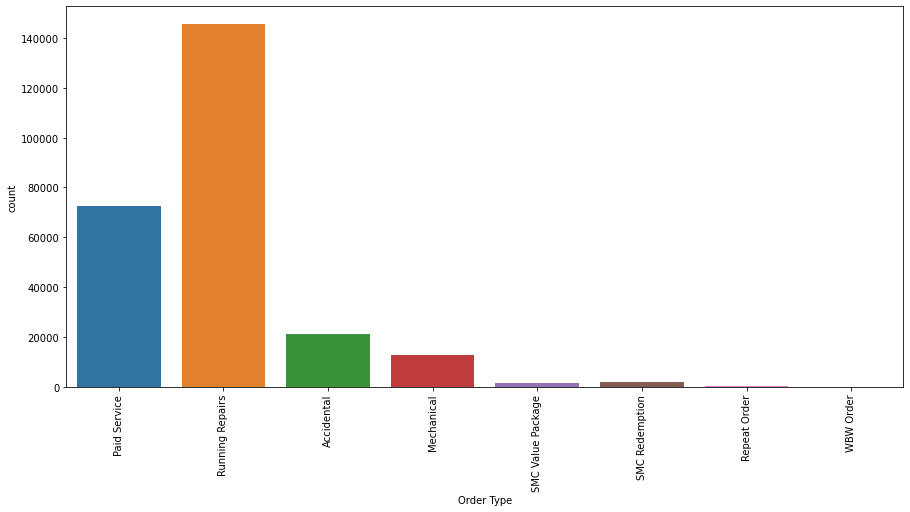

In [94]:
plt.figure(figsize=(15,7))
sns.countplot(invoice_customer_plant_jtd["Order Type"])
plt.xticks(rotation = 90)

In [95]:
invoice_customer_plant_jtd["Cust Type"].value_counts()

Retail              255368
Corporate others       154
Corporate- M&M         134
Fleets                  30
Franchise               15
MFCWL                   13
Name: Cust Type, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

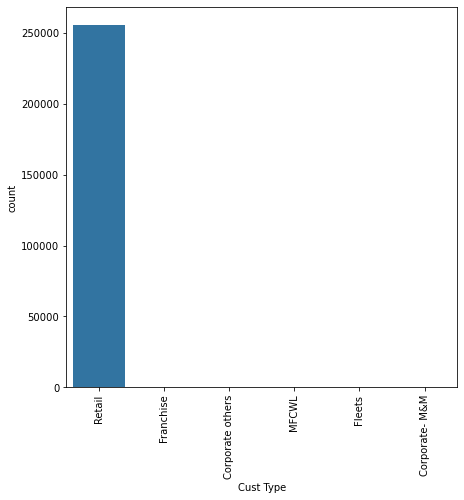

In [96]:
plt.figure(figsize=(7,7))
sns.countplot(invoice_customer_plant_jtd["Cust Type"])
plt.xticks(rotation = 90)

In [97]:
le = LabelEncoder()

In [98]:
invoice_customer_plant_jtd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255714 entries, 0 to 255713
Data columns (total 22 columns):
Cust Type               255714 non-null object
Customer No.            255714 non-null object
State                   255714 non-null object
Job Card No             255714 non-null int64
KMs Reading             255714 non-null int32
Labour Total            255714 non-null float64
Make                    255714 non-null object
Misc Total              255714 non-null float64
OSL Total               255714 non-null float64
Order Type              255714 non-null object
Parts Total             255714 non-null float64
Regn No                 255714 non-null object
Total Amt Wtd Tax.      255714 non-null float64
Invoice month           255714 non-null int64
Partner Type            255714 non-null float64
Data Origin             255714 non-null object
Title                   255714 non-null float64
ServiceTime_category    255714 non-null object
Description             255714 non-null

In [99]:
invoice_customer_plant_jtd_categroical_for_encode = invoice_customer_plant_jtd[['Cust Type', 'Order Type', "Make", "State", 'ServiceTime_category',"Data Origin"]]

In [100]:
invoice_customer_plant_jtd_categroical_for_encode.head()

,Cust Type,Order Type,Make,State,ServiceTime_category,Data Origin
0,Retail,Paid Service,FORD,Maharashtra,super_fast,Z010
1,Retail,Running Repairs,MARUTI SUZUKI,Maharashtra,mid,Z001
2,Retail,Running Repairs,MARUTI SUZUKI,Maharashtra,super_slow,Z001
3,Retail,Running Repairs,HYUNDAI,Maharashtra,super_slow,Z001
4,Retail,Running Repairs,MAHINDRA & MAHINDRA,Maharashtra,super_fast,Z001


In [101]:
invoice_encoded = invoice_customer_plant_jtd_categroical_for_encode.apply(le.fit_transform)

In [102]:
invoice_numerical = invoice_customer_plant_jtd.select_dtypes(include=[np.number])

In [103]:
cluster_data = pd.concat([invoice_encoded,invoice_numerical], axis=1)

In [104]:
cluster_data.head()

,Cust Type,Order Type,Make,State,ServiceTime_category,Data Origin,Job Card No,KMs Reading,Labour Total,Misc Total,OSL Total,Parts Total,Total Amt Wtd Tax.,Invoice month,Partner Type,Title,Order Quantity,Net value
0,5,2,5,20,3,9,227460,0,1802.05,0.0,0.0,399.73,2201.78,6,1.0,2.0,45.5,2201.78
1,5,4,13,20,1,0,413455,0,2874.80,0.0,0.0,3151.06,6025.86,7,1.0,2.0,202.5,6025.86
2,5,4,13,20,4,0,446448,0,2799.96,0.0,0.0,664.04,3464.00,9,1.0,2.0,189.0,3464.00
3,5,4,9,20,4,0,487708,0,554.95,0.0,0.0,1510.80,2065.75,10,1.0,2.0,7.0,2065.75
4,5,4,12,20,3,0,220109,1,75.02,0.0,0.0,578.43,653.45,5,1.0,2.0,13.0,653.45


In [105]:
cluster_data.shape

(255714, 18)

# Cluster Analysis

In [136]:
dist=[]
# Iterate from 1-9
for i in range(1, 10):
    # Initialize KMeans algorithm
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    # Fit on data
    km.fit(cluster_data)
    # Append WCSS to list storing WCSS
    dist.append(km.inertia_)

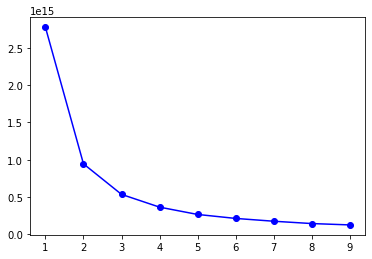

In [139]:
# Line plot # clusters on X-axis and WCSS on Y-axis 
plt.plot(range(1, 10), dist, 'bo-')
plt.show()

In [140]:
cluster  = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
# create 'cluster' column
cluster_data['cluster'] = cluster.fit_predict(cluster_data)

In [141]:
cluster_data.head()

,Cust Type,Order Type,Make,State,ServiceTime_category,Data Origin,Job Card No,KMs Reading,Labour Total,Misc Total,OSL Total,Parts Total,Total Amt Wtd Tax.,Invoice month,Partner Type,Title,Order Quantity,Net value,cluster
0,5,2,5,20,3,9,227460,0,1802.05,0.0,0.0,399.73,2201.78,6,1.0,2.0,45.5,2201.78,3
1,5,4,13,20,1,0,413455,0,2874.80,0.0,0.0,3151.06,6025.86,7,1.0,2.0,202.5,6025.86,4
2,5,4,13,20,4,0,446448,0,2799.96,0.0,0.0,664.04,3464.00,9,1.0,2.0,189.0,3464.00,1
3,5,4,9,20,4,0,487708,0,554.95,0.0,0.0,1510.80,2065.75,10,1.0,2.0,7.0,2065.75,1
4,5,4,12,20,3,0,220109,1,75.02,0.0,0.0,578.43,653.45,5,1.0,2.0,13.0,653.45,3


# Visualize clusters using PCA

In [143]:
# initialize pca object with 2 components
pca = PCA(n_components=2,random_state=0)

# create 'x' and 'y' columns donoting observation locations in decomposed form
cluster_data["x"] = pca.fit_transform(cluster_data[cluster_data.columns])[:,0]
cluster_data["y"] = pca.fit_transform(cluster_data[cluster_data.columns])[:,1]

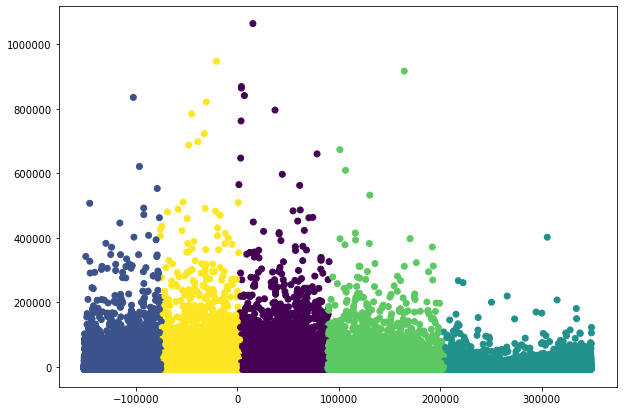

In [144]:
plt.figure(figsize=(10, 7))
plt.scatter(x=cluster_data["x"],y=cluster_data["y"],c=cluster.labels_)

In [145]:
cluster_data["cluster"].value_counts()

1    72172
4    70990
0    60032
3    44257
2     8263
Name: cluster, dtype: int64

In [146]:
invoice_customer_plant_jtd["clusters"] = cluster_data["cluster"]

In [148]:
invoice_customer_plant_jtd.head()

,Cust Type,Customer No.,State,Job Card No,KMs Reading,Labour Total,Make,Misc Total,OSL Total,Order Type,Parts Total,Regn No,Total Amt Wtd Tax.,Invoice month,Partner Type,Data Origin,Title,ServiceTime_category,Description,Item Category,Order Quantity,Net value,clusters
0,Retail,80479,Maharashtra,227460,0,1802.05,FORD,0.0,0.0,Paid Service,399.73,MH03AB0789,2201.78,6,1.0,Z010,2.0,super_fast,"Wheel Alignment, DISTILLED WATER, INSULATION T...","P002, P001",45.5,2201.78,3
1,Retail,E15810,Maharashtra,413455,0,2874.80,MARUTI SUZUKI,0.0,0.0,Running Repairs,3151.06,MH04CT295,6025.86,7,1.0,Z001,2.0,mid,"REPLACE FRONT SHOCK ABSORBER RHS, REPLACE BRAK...","P002, P001",202.5,6025.86,4
2,Retail,E15810,Maharashtra,446448,0,2799.96,MARUTI SUZUKI,0.0,0.0,Running Repairs,664.04,MH04CT295,3464.00,9,1.0,Z001,2.0,super_slow,"MISC LABOR 0.25 HOURS, GASKET, CYLINDER HEAD C...","P002, P001",189.0,3464.00,1
3,Retail,73857,Maharashtra,487708,0,554.95,HYUNDAI,0.0,0.0,Running Repairs,1510.80,MH43AN1186,2065.75,10,1.0,Z001,2.0,super_slow,"OIL FILTER VENTO, Paid Service-Minor, MFC PROL...","P002, P001",7.0,2065.75,1
4,Retail,E25519,Maharashtra,220109,1,75.02,MAHINDRA & MAHINDRA,0.0,0.0,Running Repairs,578.43,MH04DN6210,653.45,5,1.0,Z001,2.0,super_fast,"NOZZLE-LH WS WASHER, WIPER T, REMOVE & REFIT W...","P002, P001",13.0,653.45,3


# Number of retail cutomers in all clusters

In [149]:
retail = {}
for i in invoice_customer_plant_jtd["clusters"].unique():
    
    new_df = invoice_customer_plant_jtd[["clusters","Cust Type"]]
    
    counts = invoice_customer_plant_jtd[["clusters","Cust Type"]]["Cust Type"].value_counts(ascending=False)
    
    if counts.index[0]=="Retail":
        
        retail[i]=counts[i]

In [150]:
retail

{3: 30, 4: 15, 1: 154, 0: 255368, 2: 134}

[Text(0, 0.5, 'Count of Orders'), Text(0.5, 1.0, 'Revenue per month analysis')]

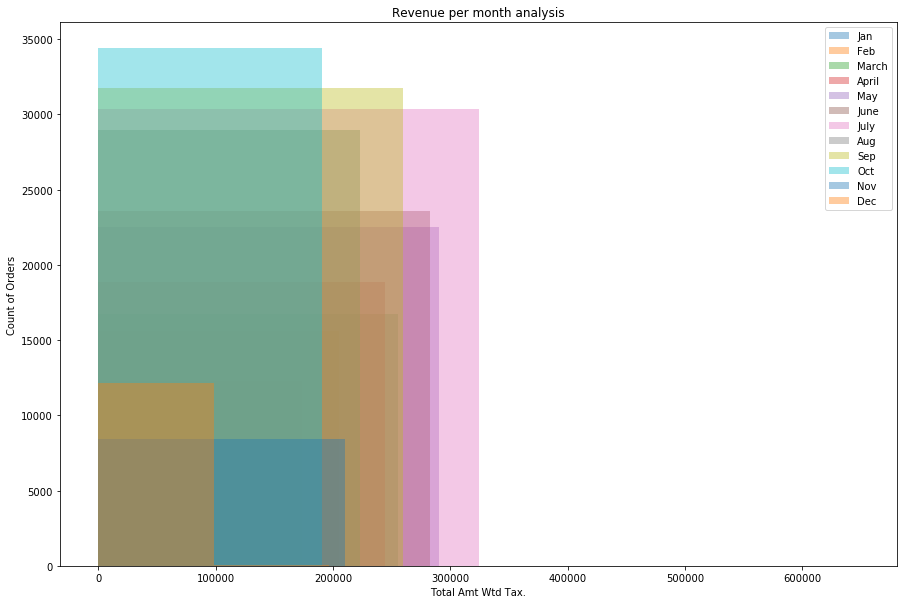

In [152]:
fig, axes = plt.subplots(figsize=(15, 10))

ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==1]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Jan", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==2]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Feb", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==3]["Total Amt Wtd Tax."].dropna(), bins=2, label = "March", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==4]["Total Amt Wtd Tax."].dropna(), bins=2, label = "April", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==5]["Total Amt Wtd Tax."].dropna(), bins=2, label = "May", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==6]["Total Amt Wtd Tax."].dropna(), bins=2, label = "June", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==7]["Total Amt Wtd Tax."].dropna(), bins=2, label = "July", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==8]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Aug", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==9]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Sep", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==10]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Oct", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==11]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Nov", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==12]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Dec", ax = axes, kde =False)
ax.legend()
ax.set(ylabel='Count of Orders', title='Revenue per month analysis')
# ax.set_title('Revenue per month analysis')


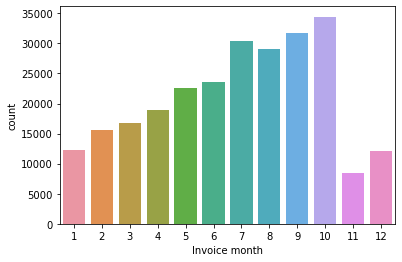

In [153]:
sns.countplot(invoice_customer_plant_jtd["Invoice month"])

In [154]:
invoice_customer_plant_jtd["State"].value_counts()

Tamil Nadu              90397
Maharashtra             38873
Karnataka               29137
Punjab                  14821
Madhya Pradesh          13479
Rajasthan               13437
Andhra Pradesh           9801
Uttar Pradesh            7459
Haryana                  6026
Gujarat                  5771
Telangana                5480
Bihar                    3252
Himachal Pradesh         3230
Chandigarh               2559
Uttarakhand              2507
Kerala                   2475
Odisha                   2299
Puducherry               1699
West Bengal              1322
Chhattisgarh              621
Delhi                     573
Jharkhand                 251
Assam                      98
Dadra and Nagar Hav.       36
Daman and Diu              32
Arunachal Pradesh          28
Jammu and Kashmir          12
Goa                        10
Andaman and Nico.In.        8
Nagaland                    6
Sikkim                      6
Tripura                     3
Megalaya                    2
Manipur   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

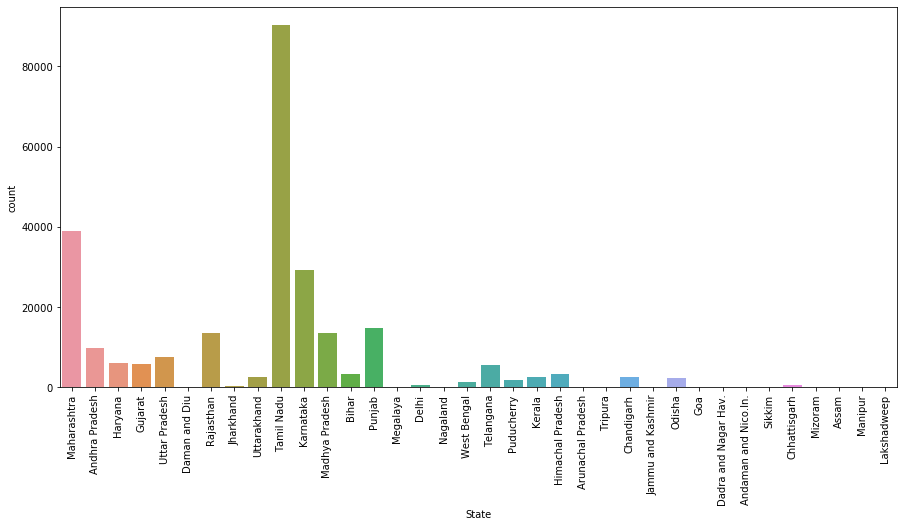

In [157]:
plt.figure(figsize=(15,7))
sns.countplot(invoice_customer_plant_jtd["State"])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

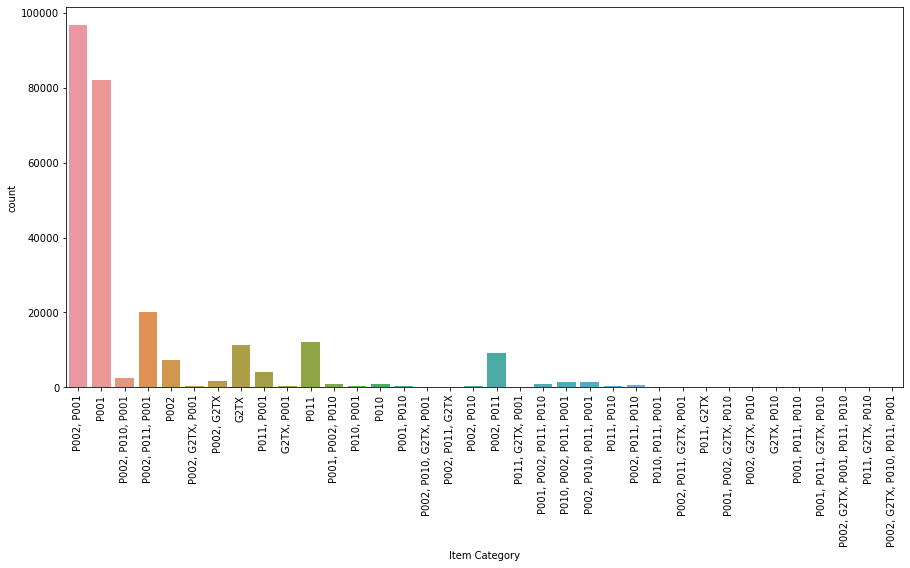

In [158]:
plt.figure(figsize=(15,7))
sns.countplot(invoice_customer_plant_jtd["Item Category"])
plt.xticks(rotation = 90)

In [159]:
invoice_customer_plant_jtd["Make"].value_counts()

MARUTI SUZUKI           73510
MAHINDRA &  MAHINDRA    45804
HYUNDAI                 38859
TATA MOTORS             33014
GENERAL MOTORS          16387
FORD                    11863
TOYOTA                  11396
HONDA                    6905
VOLKSWAGEN               4056
SKODA                    3600
FIAT                     3185
RENAULT                  2760
NISSAN                   2174
MITSUBISHI MOTORS         916
BMW                       192
HINDUSTAN MOTORS          188
MERCEDES BENZ             186
AUDI                      182
FORCE                     174
DAEWOO                    168
PREMIER AUTOMOBILES        77
SONALIKA                   69
LAND ROVER                 17
VOLVO                      13
SAN MOTORS                  7
JEEP                        6
PORCHE                      5
MORRIS                      1
Name: Make, dtype: int64

[Text(0, 0.5, 'Count of Cars'),
 Text(0.5, 1.0, 'Make of Cars based Revenue Analysis')]

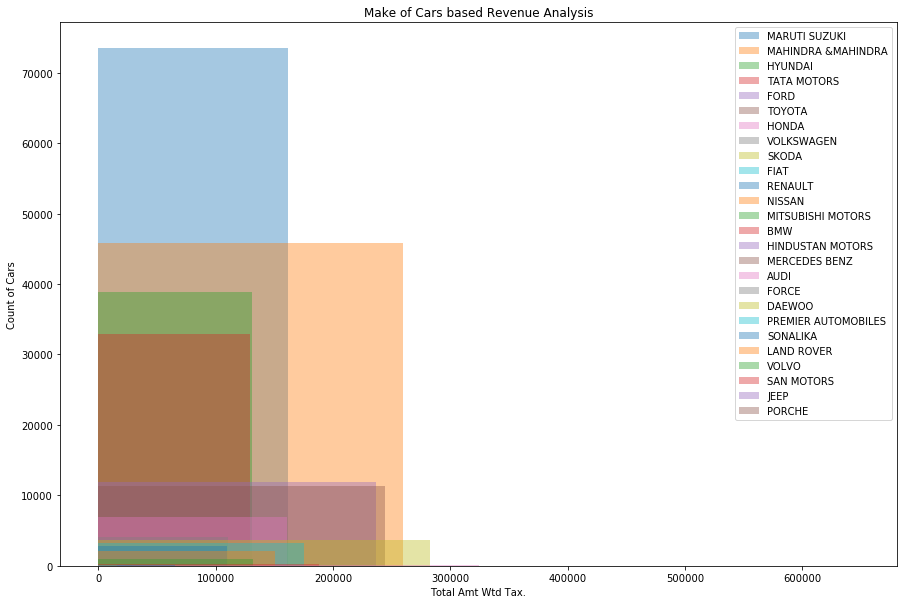

In [160]:
fig, axes = plt.subplots(figsize=(15, 10))

ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="MARUTI SUZUKI"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "MARUTI SUZUKI", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="MAHINDRA &  MAHINDRA"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "MAHINDRA &MAHINDRA", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="HYUNDAI"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "HYUNDAI", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="TATA MOTORS"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "TATA MOTORS", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="FORD"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "FORD", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="TOYOTA"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "TOYOTA", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="HONDA"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "HONDA", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="VOLKSWAGEN"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "VOLKSWAGEN", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="SKODA"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "SKODA", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="FIAT"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "FIAT", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="RENAULT"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "RENAULT", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="NISSAN"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "NISSAN", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="MITSUBISHI MOTORS"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "MITSUBISHI MOTORS", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="BMW"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "BMW", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="HINDUSTAN MOTORS"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "HINDUSTAN MOTORS", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="MERCEDES BENZ"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "MERCEDES BENZ", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="AUDI"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "AUDI", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="FORCE"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "FORCE", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="DAEWOO"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "DAEWOO", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="PREMIER AUTOMOBILES"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "PREMIER AUTOMOBILES", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="SONALIKA"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "SONALIKA", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="LAND ROVER"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "LAND ROVER", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="VOLVO"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "VOLVO", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="SAN MOTORS"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "SAN MOTORS", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="JEEP"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "JEEP", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="PORCHE"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "PORCHE", ax = axes, kde =False)

ax.legend()
ax.set(ylabel='Count of Cars', title='Make of Cars based Revenue Analysis')
# ax.set_title('Make of Cars based Revenue Analysis')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

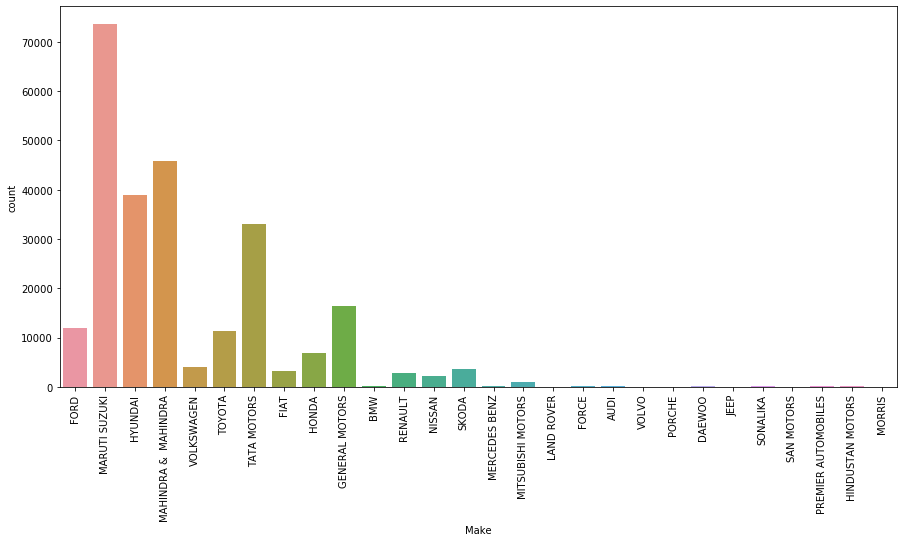

In [161]:
plt.figure(figsize=(15,7))
sns.countplot(invoice_customer_plant_jtd["Make"])
plt.xticks(rotation = 90)

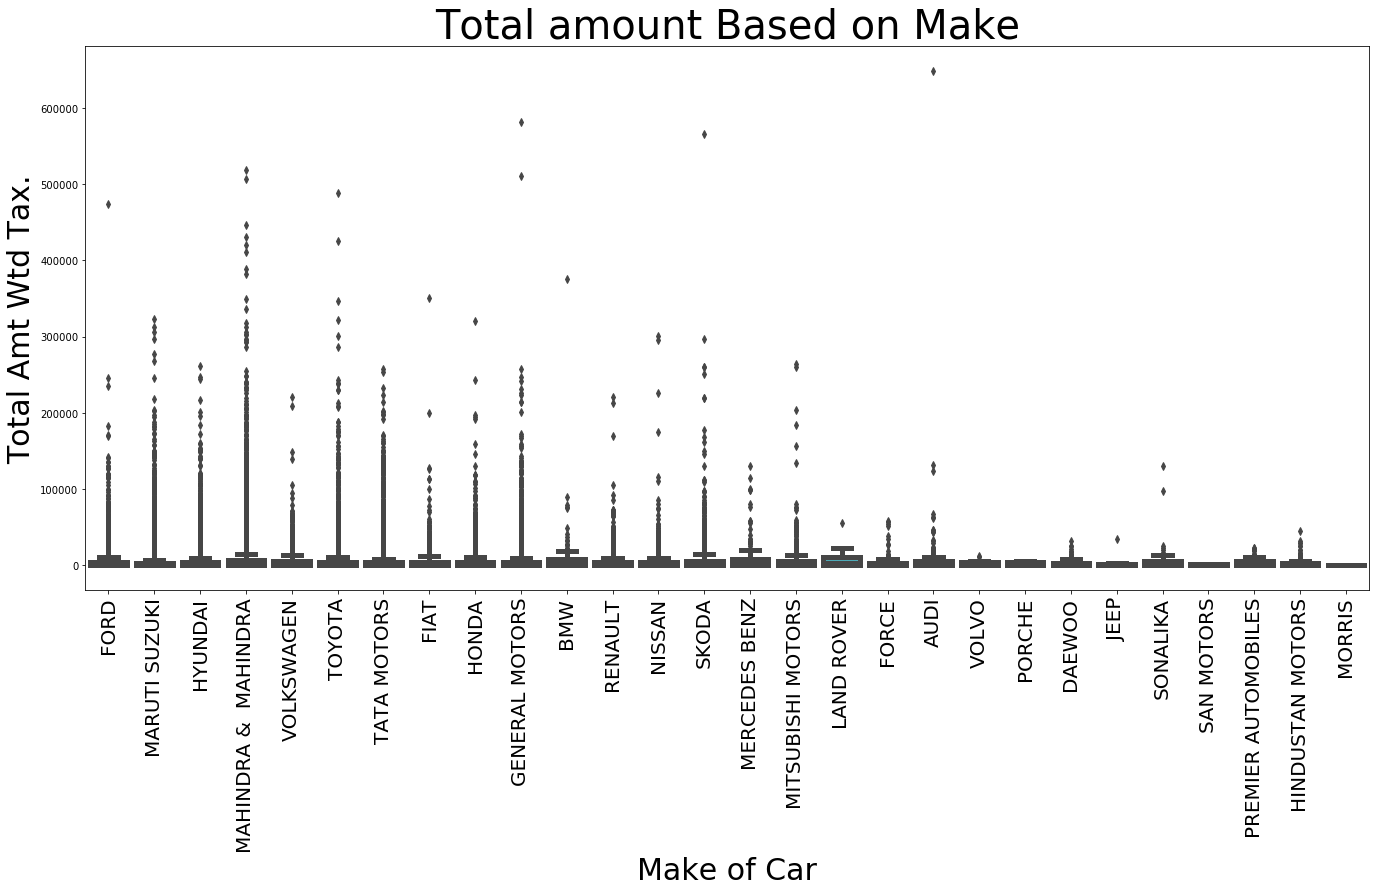

In [162]:
plt.figure(figsize=(23,10))
ax = sns.boxplot(x="Make", y="Total Amt Wtd Tax.", data=invoice_customer_plant_jtd,width=0.8,linewidth=5)
ax.set_xlabel('Make of Car',fontsize=30)
ax.set_ylabel('Total Amt Wtd Tax.',fontsize=30)
plt.title('Total amount Based on Make',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)

In [170]:
invoice_customer_plant_jtd.head()

,Cust Type,Customer No.,State,Job Card No,KMs Reading,Labour Total,Make,Misc Total,OSL Total,Order Type,Parts Total,Regn No,Total Amt Wtd Tax.,Invoice month,Partner Type,Data Origin,Title,ServiceTime_category,Description,Item Category,Order Quantity,Net value,clusters
0,Retail,80479,Maharashtra,227460,0,1802.05,FORD,0.0,0.0,Paid Service,399.73,MH03AB0789,2201.78,6,1.0,Z010,2.0,super_fast,"Wheel Alignment, DISTILLED WATER, INSULATION T...","P002, P001",45.5,2201.78,3
1,Retail,E15810,Maharashtra,413455,0,2874.80,MARUTI SUZUKI,0.0,0.0,Running Repairs,3151.06,MH04CT295,6025.86,7,1.0,Z001,2.0,mid,"REPLACE FRONT SHOCK ABSORBER RHS, REPLACE BRAK...","P002, P001",202.5,6025.86,4
2,Retail,E15810,Maharashtra,446448,0,2799.96,MARUTI SUZUKI,0.0,0.0,Running Repairs,664.04,MH04CT295,3464.00,9,1.0,Z001,2.0,super_slow,"MISC LABOR 0.25 HOURS, GASKET, CYLINDER HEAD C...","P002, P001",189.0,3464.00,1
3,Retail,73857,Maharashtra,487708,0,554.95,HYUNDAI,0.0,0.0,Running Repairs,1510.80,MH43AN1186,2065.75,10,1.0,Z001,2.0,super_slow,"OIL FILTER VENTO, Paid Service-Minor, MFC PROL...","P002, P001",7.0,2065.75,1
4,Retail,E25519,Maharashtra,220109,1,75.02,MAHINDRA & MAHINDRA,0.0,0.0,Running Repairs,578.43,MH04DN6210,653.45,5,1.0,Z001,2.0,super_fast,"NOZZLE-LH WS WASHER, WIPER T, REMOVE & REFIT W...","P002, P001",13.0,653.45,3


In [171]:
df = invoice_customer_plant_jtd.drop(["Customer No.","Job Card No","Labour Total","Misc Total","OSL Total",
                                      "Parts Total","Regn No","Data Origin","Description","Net value","clusters"],1)

In [172]:
df.head()

,Cust Type,State,KMs Reading,Make,Order Type,Total Amt Wtd Tax.,Invoice month,Partner Type,Title,ServiceTime_category,Item Category,Order Quantity
0,Retail,Maharashtra,0,FORD,Paid Service,2201.78,6,1.0,2.0,super_fast,"P002, P001",45.5
1,Retail,Maharashtra,0,MARUTI SUZUKI,Running Repairs,6025.86,7,1.0,2.0,mid,"P002, P001",202.5
2,Retail,Maharashtra,0,MARUTI SUZUKI,Running Repairs,3464.00,9,1.0,2.0,super_slow,"P002, P001",189.0
3,Retail,Maharashtra,0,HYUNDAI,Running Repairs,2065.75,10,1.0,2.0,super_slow,"P002, P001",7.0
4,Retail,Maharashtra,1,MAHINDRA & MAHINDRA,Running Repairs,653.45,5,1.0,2.0,super_fast,"P002, P001",13.0


In [173]:
cat_df = df.select_dtypes(include = "object")

In [174]:
cat_df.head()

,Cust Type,State,Make,Order Type,ServiceTime_category,Item Category
0,Retail,Maharashtra,FORD,Paid Service,super_fast,"P002, P001"
1,Retail,Maharashtra,MARUTI SUZUKI,Running Repairs,mid,"P002, P001"
2,Retail,Maharashtra,MARUTI SUZUKI,Running Repairs,super_slow,"P002, P001"
3,Retail,Maharashtra,HYUNDAI,Running Repairs,super_slow,"P002, P001"
4,Retail,Maharashtra,MAHINDRA & MAHINDRA,Running Repairs,super_fast,"P002, P001"


In [175]:
dummy = pd.get_dummies(cat_df)
final_df = pd.concat([df,dummy],1)

In [176]:
final_df.drop(list(cat_df),1, inplace = True)

In [177]:
final_df.head()

,KMs Reading,Total Amt Wtd Tax.,Invoice month,Partner Type,Title,Order Quantity,Cust Type_Corporate others,Cust Type_Corporate- M&M,Cust Type_Fleets,Cust Type_Franchise,Cust Type_MFCWL,Cust Type_Retail,State_Andaman and Nico.In.,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chandigarh,State_Chhattisgarh,State_Dadra and Nagar Hav.,State_Daman and Diu,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu and Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Lakshadweep,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Megalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Rajasthan,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Make_AUDI,Make_BMW,Make_DAEWOO,Make_FIAT,Make_FORCE,Make_FORD,Make_GENERAL MOTORS,Make_HINDUSTAN MOTORS,Make_HONDA,Make_HYUNDAI,Make_JEEP,Make_LAND ROVER,Make_MAHINDRA & MAHINDRA,Make_MARUTI SUZUKI,Make_MERCEDES BENZ,Make_MITSUBISHI MOTORS,Make_MORRIS,Make_NISSAN,Make_PORCHE,Make_PREMIER AUTOMOBILES,Make_RENAULT,Make_SAN MOTORS,Make_SKODA,Make_SONALIKA,Make_TATA MOTORS,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Order Type_Accidental,Order Type_Mechanical,Order Type_Paid Service,Order Type_Repeat Order,Order Type_Running Repairs,Order Type_SMC Redemption,Order Type_SMC Value Package,Order Type_WBW Order,ServiceTime_category_fast,ServiceTime_category_mid,ServiceTime_category_slow,ServiceTime_category_super_fast,ServiceTime_category_super_slow,Item Category_G2TX,"Item Category_G2TX, P001","Item Category_G2TX, P010",Item Category_P001,"Item Category_P001, P002, G2TX, P010","Item Category_P001, P002, P010","Item Category_P001, P002, P011, P010","Item Category_P001, P010","Item Category_P001, P011, G2TX, P010","Item Category_P001, P011, P010",Item Category_P002,"Item Category_P002, G2TX","Item Category_P002, G2TX, P001","Item Category_P002, G2TX, P001, P011, P010","Item Category_P002, G2TX, P010","Item Category_P002, G2TX, P010, P011, P001","Item Category_P002, P001","Item Category_P002, P010","Item Category_P002, P010, G2TX, P001","Item Category_P002, P010, P001","Item Category_P002, P010, P011, P001","Item Category_P002, P011","Item Category_P002, P011, G2TX","Item Category_P002, P011, G2TX, P001","Item Category_P002, P011, P001","Item Category_P002, P011, P010",Item Category_P010,"Item Category_P010, P001","Item Category_P010, P002, P011, P001","Item Category_P010, P011, P001",Item Category_P011,"Item Category_P011, G2TX","Item Category_P011, G2TX, P001","Item Category_P011, G2TX, P010","Item Category_P011, P001","Item Category_P011, P010"
0,0,2201.78,6,1.0,2.0,45.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,6025.86,7,1.0,2.0,202.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,3464.00,9,1.0,2.0,189.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2065.75,10,1.0,2.0,7.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,653.45,5,1.0,2.0,13.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [178]:
scalar = MinMaxScaler()
new_df = scalar.fit_transform(final_df)
scl_df = pd.DataFrame(new_df,columns=final_df.columns)

In [179]:
scl_df.head()

,KMs Reading,Total Amt Wtd Tax.,Invoice month,Partner Type,Title,Order Quantity,Cust Type_Corporate others,Cust Type_Corporate- M&M,Cust Type_Fleets,Cust Type_Franchise,Cust Type_MFCWL,Cust Type_Retail,State_Andaman and Nico.In.,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chandigarh,State_Chhattisgarh,State_Dadra and Nagar Hav.,State_Daman and Diu,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu and Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Lakshadweep,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Megalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Rajasthan,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Make_AUDI,Make_BMW,Make_DAEWOO,Make_FIAT,Make_FORCE,Make_FORD,Make_GENERAL MOTORS,Make_HINDUSTAN MOTORS,Make_HONDA,Make_HYUNDAI,Make_JEEP,Make_LAND ROVER,Make_MAHINDRA & MAHINDRA,Make_MARUTI SUZUKI,Make_MERCEDES BENZ,Make_MITSUBISHI MOTORS,Make_MORRIS,Make_NISSAN,Make_PORCHE,Make_PREMIER AUTOMOBILES,Make_RENAULT,Make_SAN MOTORS,Make_SKODA,Make_SONALIKA,Make_TATA MOTORS,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Order Type_Accidental,Order Type_Mechanical,Order Type_Paid Service,Order Type_Repeat Order,Order Type_Running Repairs,Order Type_SMC Redemption,Order Type_SMC Value Package,Order Type_WBW Order,ServiceTime_category_fast,ServiceTime_category_mid,ServiceTime_category_slow,ServiceTime_category_super_fast,ServiceTime_category_super_slow,Item Category_G2TX,"Item Category_G2TX, P001","Item Category_G2TX, P010",Item Category_P001,"Item Category_P001, P002, G2TX, P010","Item Category_P001, P002, P010","Item Category_P001, P002, P011, P010","Item Category_P001, P010","Item Category_P001, P011, G2TX, P010","Item Category_P001, P011, P010",Item Category_P002,"Item Category_P002, G2TX","Item Category_P002, G2TX, P001","Item Category_P002, G2TX, P001, P011, P010","Item Category_P002, G2TX, P010","Item Category_P002, G2TX, P010, P011, P001","Item Category_P002, P001","Item Category_P002, P010","Item Category_P002, P010, G2TX, P001","Item Category_P002, P010, P001","Item Category_P002, P010, P011, P001","Item Category_P002, P011","Item Category_P002, P011, G2TX","Item Category_P002, P011, G2TX, P001","Item Category_P002, P011, P001","Item Category_P002, P011, P010",Item Category_P010,"Item Category_P010, P001","Item Category_P010, P002, P011, P001","Item Category_P010, P011, P001",Item Category_P011,"Item Category_P011, G2TX","Item Category_P011, G2TX, P001","Item Category_P011, G2TX, P010","Item Category_P011, P001","Item Category_P011, P010"
0,0.000000,0.003607,0.454545,0.0,1.0,0.000313,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.009506,0.545455,0.0,1.0,0.001393,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.005554,0.727273,0.0,1.0,0.001300,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,

In [182]:
scl_df.shape

(255714, 126)

In [183]:
X = scl_df.drop(["Total Amt Wtd Tax."],1)
y = scl_df["Total Amt Wtd Tax."]

In [184]:
X_train,X_test,y_train,y_test = tts(X,y, random_state=42, test_size = 0.2)

In [185]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
r2_score_knn = r2_score(y_pred_knn,y_test)
r2_score_knn

-0.7866610134927547

In [186]:
dt = DecisionTreeRegressor(max_depth=50)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
r2_score_dt = r2_score(y_pred_dt,y_test)
r2_score_dt

0.030686671682458533

In [187]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
r2_score_lr = r2_score(y_pred_lr,y_test)
r2_score_lr

-3.909487809528045e-05

In [188]:
rd = Ridge()
rd.fit(X_train,y_train)
y_pred_rd = rd.predict(X_test)
r2_score_rd = r2_score(y_pred_rd,y_test)
r2_score_rd

-1.4194068431516795

In [189]:
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)
r2_score_ls = r2_score(y_pred_ls,y_test)
r2_score_ls

-4.267639087401186e+32

In [190]:
mae_knn = mean_absolute_error(y_test,y_pred_knn)
mae_dt = mean_absolute_error(y_test,y_pred_dt)
mae_lr = mean_absolute_error(y_test,y_pred_lr)
mae_rd = mean_absolute_error(y_test,y_pred_rd)
mae_ls = mean_absolute_error(y_test,y_pred_ls)

In [191]:
rmse_knn = np.sqrt(mean_squared_error(y_test,y_pred_knn))
rmse_dt = np.sqrt(mean_squared_error(y_test,y_pred_dt))
rmse_lr = np.sqrt(mean_squared_error(y_test,y_pred_lr))
rmse_rd = np.sqrt(mean_squared_error(y_test,y_pred_rd))
rmse_ls = np.sqrt(mean_squared_error(y_test,y_pred_ls))

In [192]:
acc_df = pd.DataFrame({
    'Model': ['KNN',"Decision Tree", "Linear Reg","Ridge","Lasso"],
    'MAE': [mae_knn, mae_dt, mae_lr, mae_rd, mae_ls],
    'RMSE': [rmse_knn, rmse_dt, rmse_lr, rmse_rd, rmse_ls]})

acc_df = acc_df.set_index('Model')
acc_df

,MAE,RMSE
Model,,
KNN,0.004869,1.558122e-02
Decision Tree,0.005195,1.789725e-02
Linear Reg,327787.586567,5.242531e+07
Ridge,0.005775,1.528511e-02
Lasso,0.007566,1.791819e-02


In [193]:
plant.head()

,Plant,Name 1,Postal Code,City,State_Plant
0,BC07,NERKUNDRAM,600107,Chennai,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,160055,Mohali,Punjab
2,X001,X001 - AUTO PLANET WHEELS,400610,Thane,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,201010,Ghaziabad,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,560087,Bengaluru,Karnataka


# New Plant Location & Count

In [205]:
df_plant_check.columns

Index(['CITY', 'Cust Type', 'Customer No.', 'State', 'Invoice Date',
       'Invoice No', 'Invoice Time', 'Job Card No', 'JobCard Date',
       'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
       'Model', 'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Regn No', 'Total Amt Wtd Tax.', 'User ID',
       'Invoice month', 'Partner Type', 'Data Origin', 'Title', 'Name 1',
       'Postal Code', 'City', 'State_Plant'],
      dtype='object')

In [282]:
df_grouped = df_plant_check.groupby('State').agg({'Job Card No':'count', 'Total Amt Wtd Tax.': 'sum', 'Plant':'nunique'}).reset_index()
df_grouped.head()

,State,Job Card No,Total Amt Wtd Tax.,Plant
0,Andaman and Nico.In.,8,7.203385e+04,5
1,Andhra Pradesh,9801,4.232841e+07,70
2,Arunachal Pradesh,28,4.581117e+04,10
3,Assam,98,1.320088e+05,7
4,Bihar,3253,1.492637e+07,26


In [283]:
# Normalization of data
df_grouped['Total Amt Wtd Tax.']=df_grouped['Total Amt Wtd Tax.']/2000000
df_grouped['Job Card No']= df_grouped['Job Card No']/500
df_grouped['New Garage Factor']= (df_grouped['Job Card No']/df_grouped['Plant'])* \
                                     (df_grouped['Total Amt Wtd Tax.']/df_grouped['Plant'])
df_grouped['New Garage Count']= (df_grouped['New Garage Factor']/df_grouped['New Garage Factor'].mean()).round()

In [284]:
df_grouped.sort_values('New Garage Factor').tail(10)

,State,Job Card No,Total Amt Wtd Tax.,Plant,New Garage Factor,New Garage Count
5,Chandigarh,5.118,7.688359,22,0.081300,0.0
1,Andhra Pradesh,19.602,21.164207,70,0.084665,0.0
25,Odisha,4.606,2.856602,11,0.108740,0.0
28,Rajasthan,26.876,24.129787,63,0.163394,1.0
19,Madhya Pradesh,26.968,29.983691,56,0.257844,1.0
16,Karnataka,58.286,51.638322,90,0.371579,2.0
31,Telangana,10.962,14.099799,20,0.386405,2.0
20,Maharashtra,77.748,80.453058,112,0.498650,2.0
27,Punjab,29.642,35.074158,39,0.683543,3.0
30,Tamil Nadu,180.828,212.942348,83,5.589482,23.0


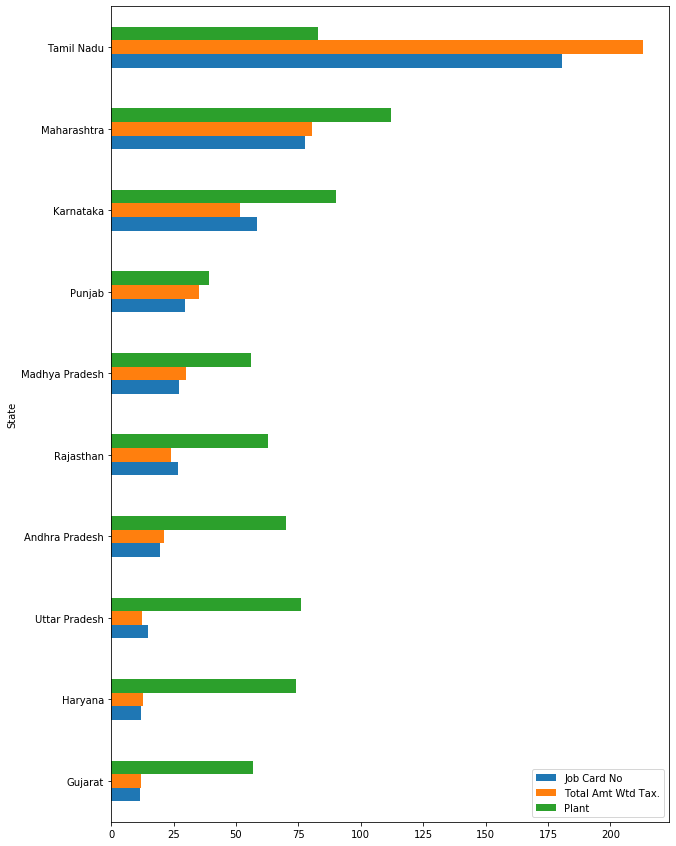

In [267]:
# plt.figure(figsize=(15,7))
df_grouped_top = df_grouped.sort_values('Job Card No').tail(10)
df_grouped_top.plot(x="State", y=['Job Card No', 'Total Amt Wtd Tax.', 'Plant'], kind="barh", figsize=(10, 15))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

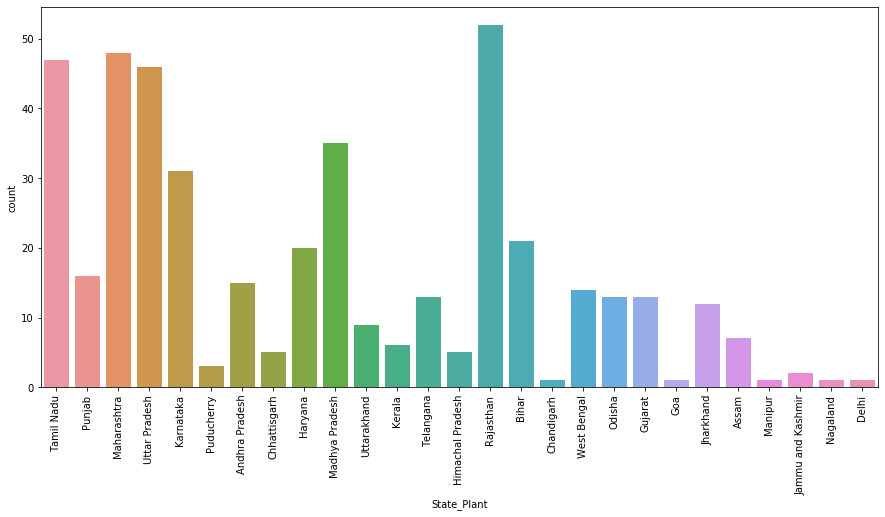

In [194]:
plt.figure(figsize=(15,7))
sns.countplot(plant["State_Plant"])
plt.xticks(rotation = 90)
# no of plants, revenue, no of orders - state wise can define new store opening locations

# ARIMA Revenue Forcasting

In [106]:
final_invoice.columns

Index(['CITY', 'Cust Type', 'Customer No.', 'State', 'Invoice Date',
       'Invoice No', 'Invoice Time', 'Job Card No', 'JobCard Date',
       'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
       'Model', 'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Regn No', 'Total Amt Wtd Tax.', 'User ID',
       'Invoice month'],
      dtype='object')

In [107]:
invoice= final_invoice.rename(columns={'Total Amt Wtd Tax.':'revenue'})
invoice['Invoice Date'] = pd.to_datetime(invoice['Invoice Date'])

In [108]:
invoice.head()

,CITY,Cust Type,Customer No.,State,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,revenue,User ID,Invoice month
0,Thane,Retail,67849,Maharashtra,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,KA19MA1291,4051.95,BC01FS1,1
1,THNAE,Retail,84419,Maharashtra,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603,BC01,THANE,MH43R3046,1001.29,BC01SA2,1
2,THANE[W],Retail,81055,Maharashtra,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,0.00,Running Repairs,52.95,400607,BC01,THANE,AP09AX0582,233.14,BC01SA2,1
3,THNAE,Retail,84419,Maharashtra,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,0.00,SMC Redemption,0.00,400603,BC01,THANE,MH43R3046,0.00,BC01SA2,1
4,THANE,Retail,18980,Maharashtra,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,499.99,Paid Service,944.16,400603,BC01,THANE,MH04CD9768,2747.12,BC01SA2,1


In [109]:
final = invoice.groupby('Invoice Date')['revenue'].sum().reset_index().set_index('Invoice Date').asfreq('M')
final.head()

,revenue
Invoice Date,
2012-04-30,877241.23
2012-05-31,1060161.03
2012-06-30,1360007.11
2012-07-31,1336776.59
2012-08-31,981111.27


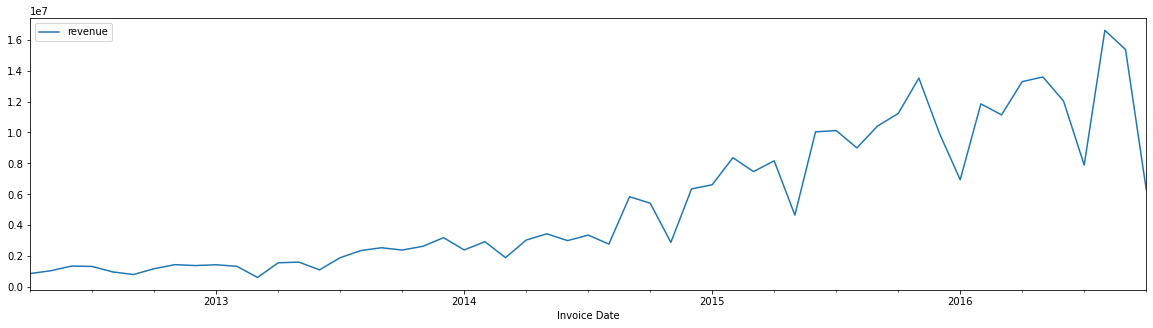

In [110]:
# Plot the data
final.plot(figsize = (20,5))
plt.show()

In [112]:
final.shape

(55, 1)

In [127]:
data= final

## Check stationary characters of the time series

In [120]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
rolmean.shape

(55, 1)

###  It is non-stationary because mean and variance is not constant

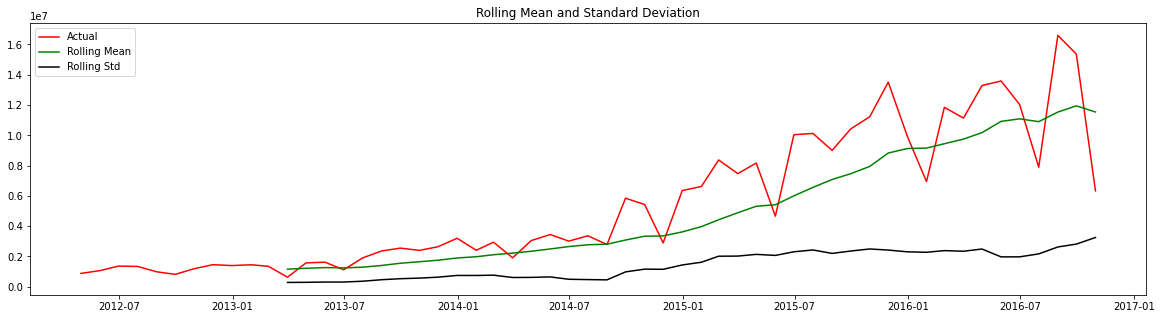

In [116]:
plt.figure(figsize=(20,5))
actual=plt.plot(data, color='red', label='Actual')
mean_rol=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_rol=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

### Using differencing to make this time series stationary

In [203]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from pylab import *

In [164]:
data_log=np.log(data)
data_log.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2012-04-30 to 2016-10-31
Freq: M
Data columns (total 1 columns):
revenue    55 non-null float64
dtypes: float64(1)
memory usage: 3.4 KB


In [175]:
data_log.index= data_log.index.to_pydatetime()

In [194]:
data_log.head()

,revenue
2012-04-30,13.684537
2012-05-31,13.873931
2012-06-30,14.123000
2012-07-31,14.105772
2012-08-31,13.796441


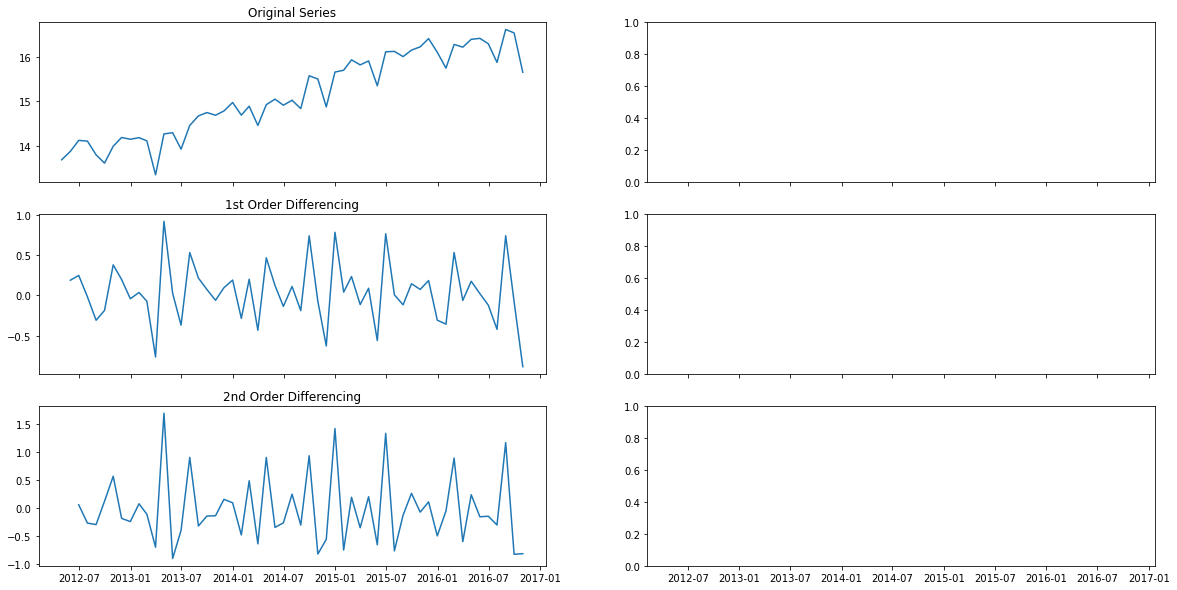

In [176]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(20,10))
axes[0, 0].plot(data_log.revenue); axes[0, 0].set_title('Original Series')
# plot_pacf(data_log.revenue, ax=axes[0, 1])

# # 1st Differencing
axes[1, 0].plot(data_log.revenue.diff()); axes[1, 0].set_title('1st Order Differencing')
# plot_acf(data_log.revenue.diff().dropna(), ax=axes[1, 1])

# # 2nd Differencing
axes[2, 0].plot(data_log.revenue.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# plot_acf(data_log.revenue.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [179]:
def check_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['revenue'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [197]:
data_log_shift=(data_log-data_log.shift(1)).dropna()
data_log_shift.head()

,revenue
2012-05-31,0.189394
2012-06-30,0.249069
2012-07-31,-0.017229
2012-08-31,-0.309331
2012-09-30,-0.186827


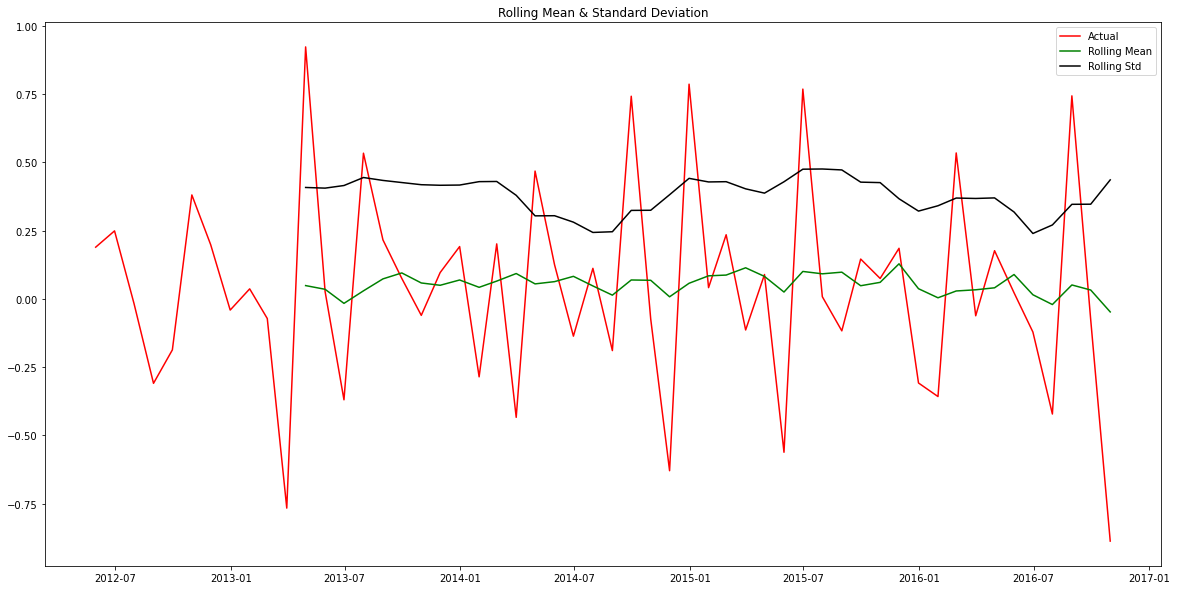

Dickey-Fuller Test: 
Test Statistic         -9.240293e+00
p-value                 1.589295e-15
Lags Used               1.000000e+00
No. of Obs              5.200000e+01
Critical Value (1%)    -3.562879e+00
Critical Value (5%)    -2.918973e+00
Critical Value (10%)   -2.597393e+00
dtype: float64


In [198]:
check_stationarity(data_log_shift)

### The results show that the test statistic is significantly less than the 1% critical value, as its stationary.

## Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF)

Text(0.5, 1.0, 'Partial Autocorrelation Function')

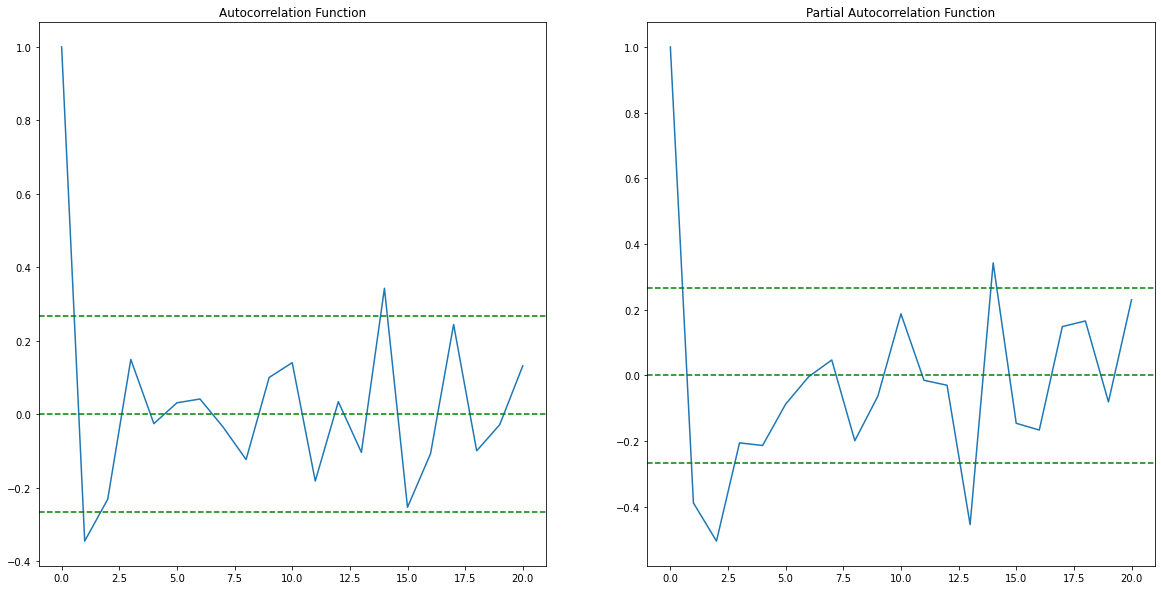

In [199]:
lag_acf=acf(data_log_shift, nlags=20)
lag_pacf=pacf(data_log_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

### In this plot, the 'p' and 'q' values can be determined as : p=2 , q=2.
### This means that the optimal values for the ARIMA(p,d,q) model are (2,1,2).

plotting ARIMA model


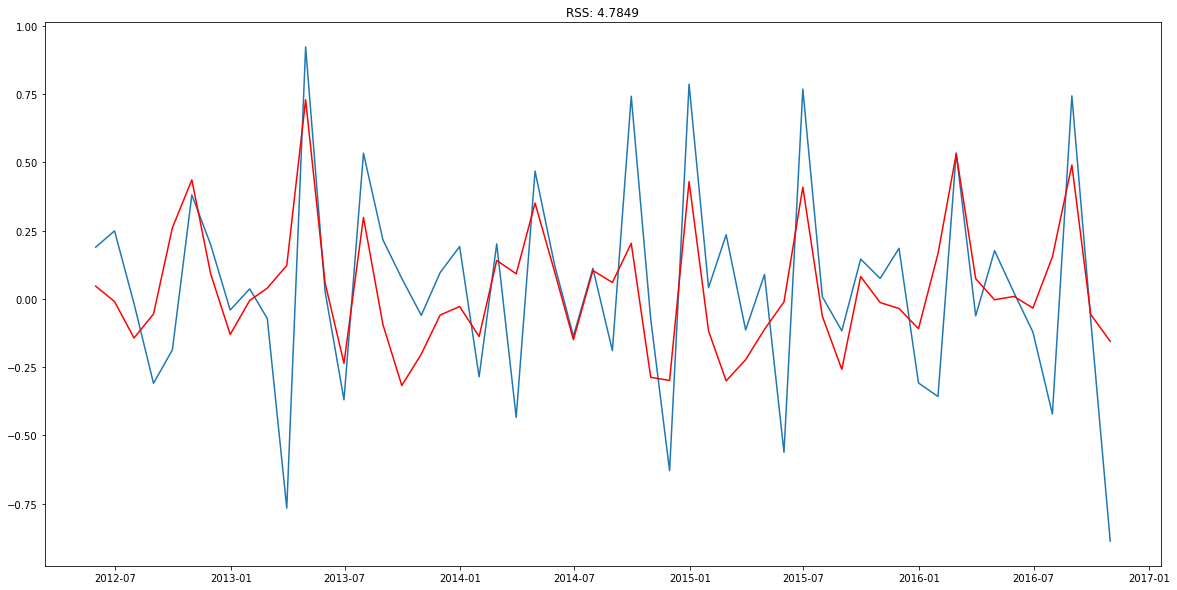

In [200]:
plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2 ))
results=model.fit(disp=-1)
plt.plot(data_log_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_log_shift['revenue'])**2))
print('plotting ARIMA model')

<Figure size 1440x648 with 0 Axes>

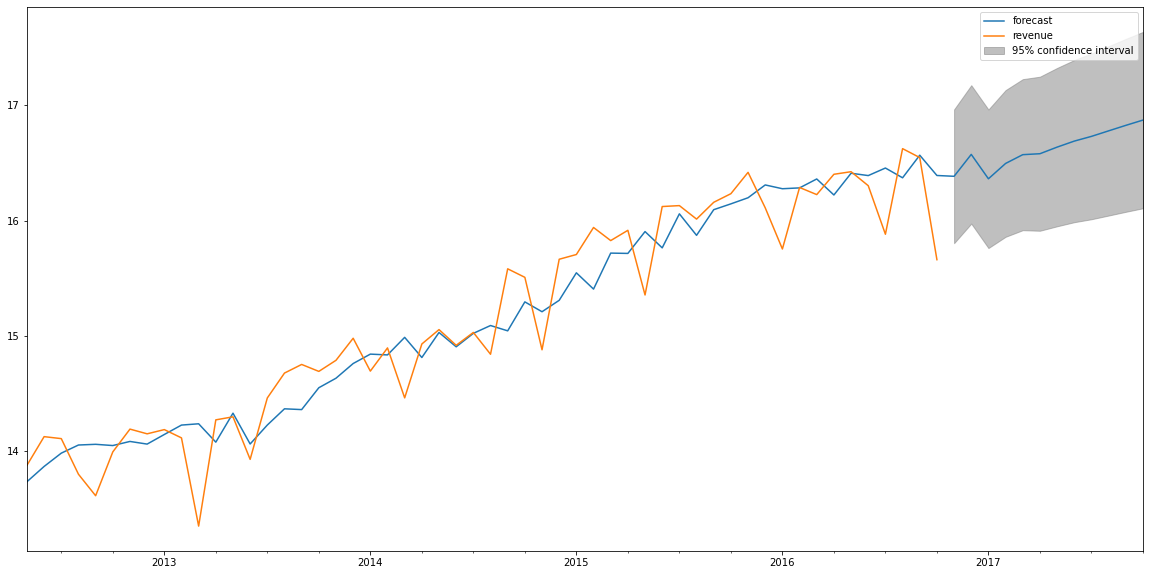

In [204]:
rcParams['figure.figsize']=20,10
plt.figure(figsize=(20,9))
results.plot_predict(1,66)
x=results.forecast(steps=12)#12 months

In [206]:
predictions=pd.Series(results.fittedvalues, copy=True)

In [205]:
# Inverse transformation and final value in log scale
predictions_cum_sum=predictions.cumsum()
predictions_log=pd.Series(data_log['revenue'].iloc[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_ARIMA=np.exp(predictions_log)
predictions_ARIMA.head()

2012-04-30    877241.230000
2012-05-31    919204.947945
2012-06-30    910191.919793
2012-07-31    788669.853375
2012-08-31    746110.781308
dtype: float64